# <center>**TALLER III - Estadística II**</center>

<center>
<img height="150px" src="https://ediciones.uis.edu.co/public/presses/1/pageHeaderLogoImage_es_ES.png">
</center>


---

#### **Integrantes**: 

*   Nicolás Galván
*   David Rojas
*   Christian Ruiz Lagos




## Ejercicio 1 - Análisis de series de tiempo

Use los datos de COVID - 19 en Colombia para hacer el análisis de series de tiempo. La tabla la encuentra en https://www.datos.gov.co/Salud-y-Protecci-n-Social/Casos-positivos-de-COVID-19-en-Colombia/gt2j-8ykr/data o ya generada en https://www.dropbox.com/s/6zhlsye308tikf9/covid_19.csv?dl=0
Compare los casos mediante Fecha de Notificación, Fecha de Diagnóstico, etc.

In [1]:
library(readr)
library(forecast)
library(dplyr)

Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
covid_19 <- read_csv("https://www.dropbox.com/s/6zhlsye308tikf9/covid_19.csv?dl=1")

Parsed with column specification:
cols(
  .default = col_character(),
  `ID de caso` = col_double(),
  `Fecha de notificación` = col_datetime(format = ""),
  Edad = col_double(),
  `Fecha de muerte` = col_datetime(format = ""),
  `Fecha diagnostico` = col_datetime(format = ""),
  `Fecha recuperado` = col_datetime(format = ""),
  `fecha reporte web` = col_datetime(format = ""),
  `Codigo departamento` = col_double(),
  `Codigo pais` = col_double()
)
See spec(...) for full column specifications.


In [3]:
head(covid_19)

ID de caso,Fecha de notificación,Código DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,...,FIS,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web,Tipo recuperación,Codigo departamento,Codigo pais,Pertenencia etnica,Nombre grupo etnico
1,2020-03-02,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,...,2020-02-27T00:00:00.000,NA,2020-03-06,2020-03-13,2020-03-06,PCR,11,380,Otro,NA
2,2020-03-06,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,...,2020-03-04T00:00:00.000,NA,2020-03-09,2020-03-19,2020-03-09,PCR,76,724,Otro,NA
3,2020-03-07,05001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,...,2020-02-29T00:00:00.000,NA,2020-03-09,2020-03-15,2020-03-09,PCR,5,724,Otro,NA
4,2020-03-09,05001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,...,2020-03-06T00:00:00.000,NA,2020-03-11,2020-03-26,2020-03-11,PCR,5,NA,Otro,NA
5,2020-03-09,05001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,...,2020-03-08T00:00:00.000,NA,2020-03-11,2020-03-23,2020-03-11,PCR,5,NA,Otro,NA
6,2020-03-10,05360,Itagüí,Antioquia,Recuperado,27,F,Relacionado,Leve,...,2020-03-06T00:00:00.000,NA,2020-03-11,2020-03-26,2020-03-11,PCR,5,NA,Otro,NA


In [4]:
dim(covid_19)

[1] 276055     21

In [5]:
covid_19$'Fecha diagnostico' <- as.Date(covid_19$'Fecha diagnostico')
covid_19$'fecha reporte web' <- as.Date(covid_19$'fecha reporte web')
covid_19$'Fecha de notificación' <- as.Date(covid_19$'Fecha de notificación')

In [6]:
# Imprimiendo  los registros únicos de fecha de diagnóstico
unique(covid_19$'Fecha diagnostico')

[1] "2020-03-06" "2020-03-09" "2020-03-11" "2020-03-12" "2020-03-13"
  [6] "2020-03-14" "2020-03-15" "2020-03-16" "2020-03-17" "2020-03-18"
 [11] "2020-03-19" "2020-03-20" "2020-03-21" "2020-03-22" "2020-03-23"
 [16] "2020-03-24" "2020-03-27" "2020-03-25" "2020-03-26" "2020-03-28"
 [21] "2020-03-29" "2020-03-30" "2020-03-31" "2020-04-01" "2020-04-02"
 [26] "2020-04-03" "2020-04-04" "2020-04-05" "2020-04-06" "2020-04-07"
 [31] "2020-04-08" "2020-04-09" "2020-04-10" "2020-04-11" "2020-04-12"
 [36] "2020-04-13" "2020-04-14" "2020-04-19" "2020-04-15" "2020-04-28"
 [41] "2020-04-16" "2020-04-17" "2020-04-18" "2020-04-20" "2020-04-22"
 [46] "2020-04-21" "2020-04-23" "2020-05-01" "2020-04-24" "2020-05-05"
 [51] "2020-04-25" "2020-04-26" "2020-04-27" "2020-04-29" "2020-04-30"
 [56] "2020-05-02" "2020-05-04" "2020-05-03" NA           "2020-05-06"
 [61] "2020-05-07" "2020-05-08" "2020-05-09" "2020-05-10" "2020-05-11"
 [66] "2020-05-12" "2020-05-13" "2020-07-05" "2020-05-14" "2020-05-15"
 [71] "2020-05-16" "2020-05-17" "2020-05-18" "2020-05-19" "2020-05-20"
 [76] "2020-05-29" "2020-05-21" "2020-05-22" "2020-07-07" "2020-05-23"
 [81] "2020-06-01" "2020-05-24" "2020-05-25" "2020-05-26" "2020-05-27"
 [86] "2020-05-28" "2020-05-30" "2020-05-31" "2020-06-03" "2020-06-02"
 [91] "2020-06-05" "2020-06-04" "2020-06-06" "2020-06-07" "2020-06-26"
 [96] "2020-06-08" "2020-06-28" "2020-06-09" "2020-06-10" "2020-06-11"
[101] "2020-06-12" "2020-06-16" "2020-06-13" "2020-06-14" "2020-07-19"
[106] "2020-06-15" "2020-06-17" "2020-06-20" "2020-07-17" "2020-06-25"
[111] "2020-06-18" "2020-06-23" "2020-06-19" "2020-07-02" "2020-06-21"
[116] "2020-07-04" "2020-07-01" "2020-06-29" "2020-06-30" "2020-07-16"
[121] "2020-07-03" "2020-06-22" "2020-06-24" "2020-07-11" "2020-07-09"
[126] "2020-07-08" "2020-06-27" "2020-07-14" "2020-07-18" "2020-07-06"
[131] "2020-07-10" "2020-07-12" "2020-07-13" "2020-07-15" "2020-07-24"
[136] "2020-07-20" "2020-07-21" "2020-07-22" "2020-07-26" "2020-07-23"
[141] "2020-07-25" "2020-07-27" "2020-07-29" "2020-07-28"

In [7]:
# Imprimiendo los registros únicos de fecha de notificación
unique(covid_19$'Fecha de notificación')

[1] "2020-03-02" "2020-03-06" "2020-03-07" "2020-03-09" "2020-03-10"
  [6] "2020-03-08" "2020-03-12" "2020-03-11" "2020-03-13" "2020-03-15"
 [11] "2020-03-14" "2020-03-16" "2020-03-17" "2020-03-18" "2020-03-19"
 [16] "2020-03-20" "2020-03-21" "2020-03-22" "2020-03-23" "2020-03-24"
 [21] "2020-03-27" "2020-03-25" "2020-03-26" "2020-03-28" "2020-03-30"
 [26] "2020-03-31" "2020-03-29" "2020-04-01" "2020-04-02" "2020-04-03"
 [31] "2020-04-04" "2020-04-05" "2020-04-06" "2020-04-08" "2020-04-07"
 [36] "2020-04-09" "2020-04-10" "2020-04-11" "2020-04-12" "2020-04-13"
 [41] "2020-04-14" "2020-04-17" "2020-04-23" "2020-04-15" "2020-04-16"
 [46] "2020-04-18" "2020-04-19" "2020-04-20" "2020-04-21" "2020-04-28"
 [51] "2020-04-22" "2020-04-29" "2020-04-24" "2020-05-01" "2020-04-25"
 [56] "2020-04-26" "2020-04-27" "2020-04-30" "2020-05-02" "2020-05-04"
 [61] "2020-05-03" "2020-05-26" "2020-05-05" "2020-05-06" "2020-05-07"
 [66] "2020-05-08" "2020-05-09" "2020-05-10" "2020-05-11" "2020-06-27"
 [71] "2020-05-12" "2020-05-13" "2020-06-26" "2020-05-18" "2020-05-14"
 [76] "2020-05-15" "2020-05-16" "2020-05-17" "2020-05-19" "2020-05-20"
 [81] "2020-06-25" "2020-05-21" "2020-05-22" "2020-07-01" "2020-05-31"
 [86] "2020-05-23" "2020-05-24" "2020-05-25" "2020-05-28" "2020-05-29"
 [91] "2020-05-27" "2020-05-30" "2020-06-01" "2020-06-18" "2020-06-03"
 [96] "2020-06-29" "2020-06-02" "2020-06-14" "2020-06-04" "2020-06-05"
[101] "2020-06-06" "2020-06-07" "2020-06-08" "2020-06-30" "2020-06-23"
[106] "2020-06-09" "2020-06-10" "2020-06-19" "2020-06-24" "2020-06-11"
[111] "2020-06-12" "2020-06-16" "2020-06-13" "2020-07-02" "2020-06-15"
[116] "2020-07-06" "2020-07-13" "2020-06-17" "2020-06-20" "2020-06-28"
[121] "2020-06-22" "2020-06-21" "2020-07-04" "2020-07-08" "2020-07-10"
[126] "2020-07-03" "2020-07-05" "2020-07-09" "2020-07-15" "2020-07-07"
[131] "2020-07-12" "2020-07-11" "2020-07-14" "2020-07-16" "2020-07-17"
[136] "2020-07-18" "2020-07-19" "2020-07-20" "2020-07-21" "2020-07-22"
[141] "2020-07-23" "2020-07-24" "2020-07-25" "2020-07-26" "2020-07-27"
[146] "2020-07-28" "2020-07-29"

In [8]:
# Imprimiendo  los registros únicos de fecha de reporte web
unique(covid_19$'fecha reporte web')

[1] "2020-03-06" "2020-03-09" "2020-03-11" "2020-03-12" "2020-03-13"
  [6] "2020-03-14" "2020-03-15" "2020-03-16" "2020-03-17" "2020-03-18"
 [11] "2020-03-19" "2020-03-20" "2020-03-21" "2020-03-22" "2020-03-23"
 [16] "2020-03-24" "2020-03-27" "2020-03-25" "2020-03-26" "2020-03-28"
 [21] "2020-03-29" "2020-03-30" "2020-03-31" "2020-04-01" "2020-04-02"
 [26] "2020-04-03" "2020-04-04" "2020-04-05" "2020-04-06" "2020-04-07"
 [31] "2020-04-08" "2020-04-09" "2020-04-10" "2020-04-11" "2020-04-12"
 [36] "2020-04-13" "2020-04-14" "2020-04-19" "2020-04-15" "2020-04-28"
 [41] "2020-04-16" "2020-04-17" "2020-04-18" "2020-04-20" "2020-04-22"
 [46] "2020-04-21" "2020-04-23" "2020-05-01" "2020-04-24" "2020-05-05"
 [51] "2020-04-25" "2020-04-26" "2020-04-27" "2020-04-29" "2020-04-30"
 [56] "2020-05-02" "2020-05-04" "2020-05-03" "2020-05-06" "2020-05-07"
 [61] "2020-05-08" "2020-05-09" "2020-05-10" "2020-05-11" "2020-05-12"
 [66] "2020-05-13" "2020-05-14" "2020-05-15" "2020-05-16" "2020-05-17"
 [71] "2020-05-18" "2020-05-19" "2020-05-20" "2020-05-21" "2020-05-22"
 [76] "2020-05-23" "2020-05-24" "2020-05-25" "2020-05-26" "2020-05-27"
 [81] "2020-05-28" "2020-05-29" "2020-05-30" "2020-05-31" "2020-06-01"
 [86] "2020-06-02" "2020-06-03" "2020-06-04" "2020-06-05" "2020-06-06"
 [91] "2020-06-07" "2020-06-08" "2020-06-09" "2020-06-10" "2020-06-11"
 [96] "2020-06-12" "2020-06-13" "2020-06-14" "2020-06-15" "2020-06-16"
[101] "2020-06-17" "2020-06-18" "2020-06-19" "2020-06-20" "2020-06-21"
[106] "2020-06-22" "2020-06-23" "2020-06-24" "2020-06-25" "2020-06-26"
[111] "2020-06-27" "2020-06-28" "2020-06-29" "2020-06-30" "2020-07-01"
[116] "2020-07-02" "2020-07-03" "2020-07-04" "2020-07-05" "2020-07-06"
[121] "2020-07-07" "2020-07-08" "2020-07-09" "2020-07-10" "2020-07-11"
[126] "2020-07-12" "2020-07-13" "2020-07-14" "2020-07-15" "2020-07-16"
[131] "2020-07-17" "2020-07-18" "2020-07-19" "2020-07-20" "2020-07-21"
[136] "2020-07-22" "2020-07-23" "2020-07-24" "2020-07-25" "2020-07-26"
[141] "2020-07-27" "2020-07-28" "2020-07-29"

In [46]:
casos.fn <- with(covid_19,data.frame(table(`Fecha de notificación`)))
casos.fd <- with(covid_19,data.frame(table(`Fecha diagnostico`)))
casos.frw <- with(covid_19,data.frame(table(`fecha reporte web`)))

In [48]:
head(casos.fn)
head(casos.fd)
head(casos.frw)

Fecha.de.notificación,Freq
2020-03-02,1
2020-03-06,1
2020-03-07,1
2020-03-08,2
2020-03-09,3
2020-03-10,4


Fecha.diagnostico,Freq
2020-03-06,1
2020-03-09,2
2020-03-11,6
2020-03-12,5
2020-03-13,5
2020-03-14,18


fecha.reporte.web,Freq
2020-03-06,1
2020-03-09,2
2020-03-11,6
2020-03-12,5
2020-03-13,5
2020-03-14,18


## FECHA DE NOTIFICACIÓN

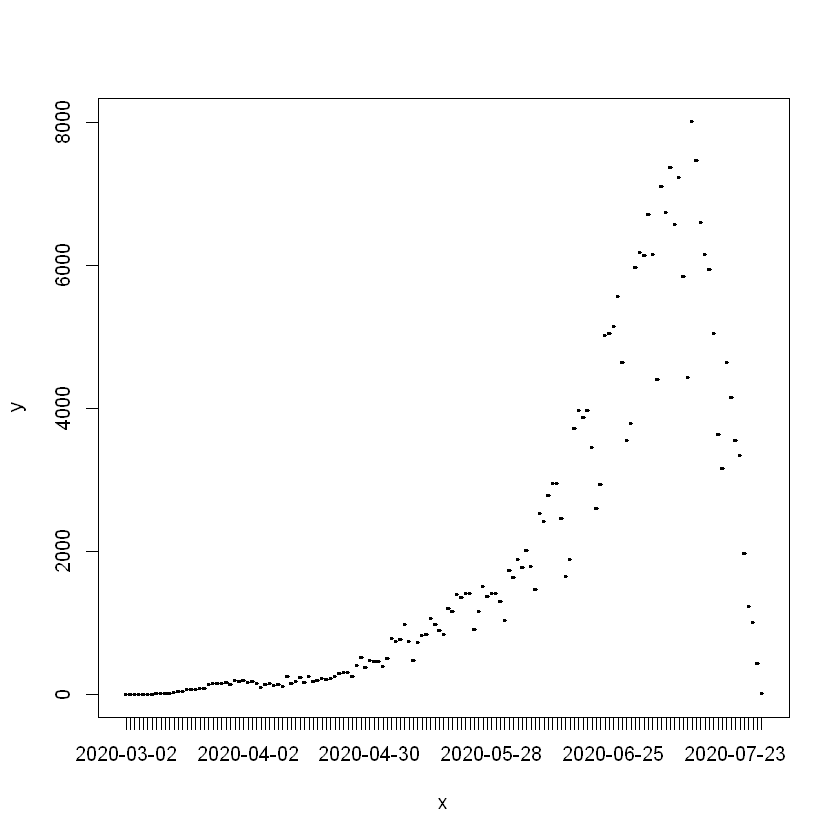

In [49]:
with(casos.fn, plot(Fecha.de.notificación, Freq))

Se puede observar un descenso en la frecuencia de notificación de los casos en los últimos días.

In [50]:
casosfn <- casos.fn$Freq

Se trabajará con dos escenarios de estacionalidad, uno sin estacionalidad y otro con estacionalidad de 7 días.

In [58]:
# estacionalidad
casosfn.ts1<-ts(casosfn[-1], frequency = 7)
casosfn.ts2<-ts(casosfn[-1])

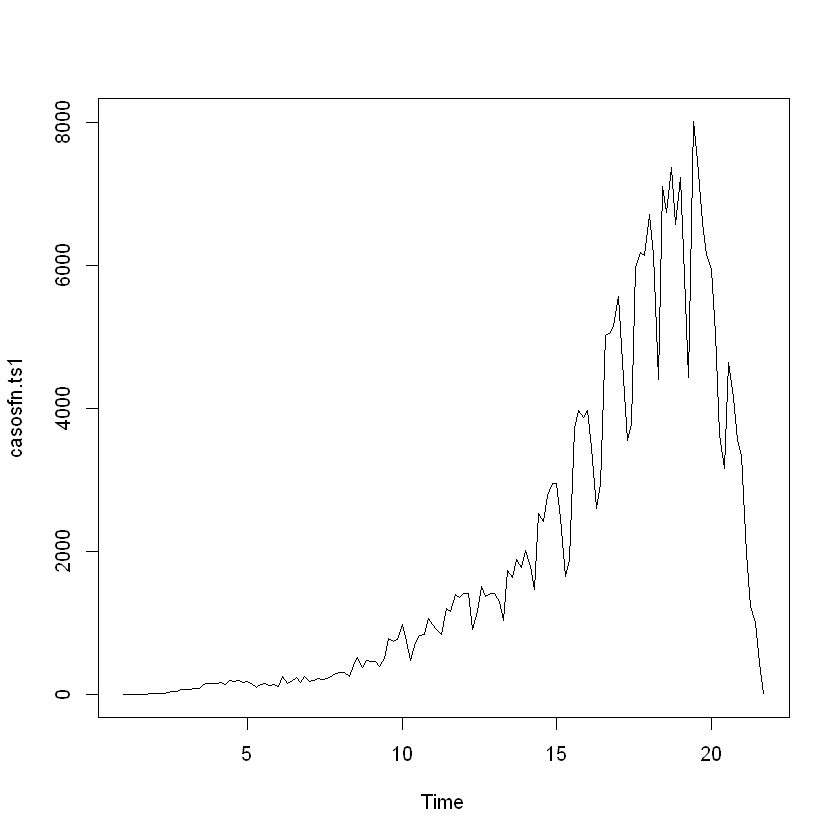

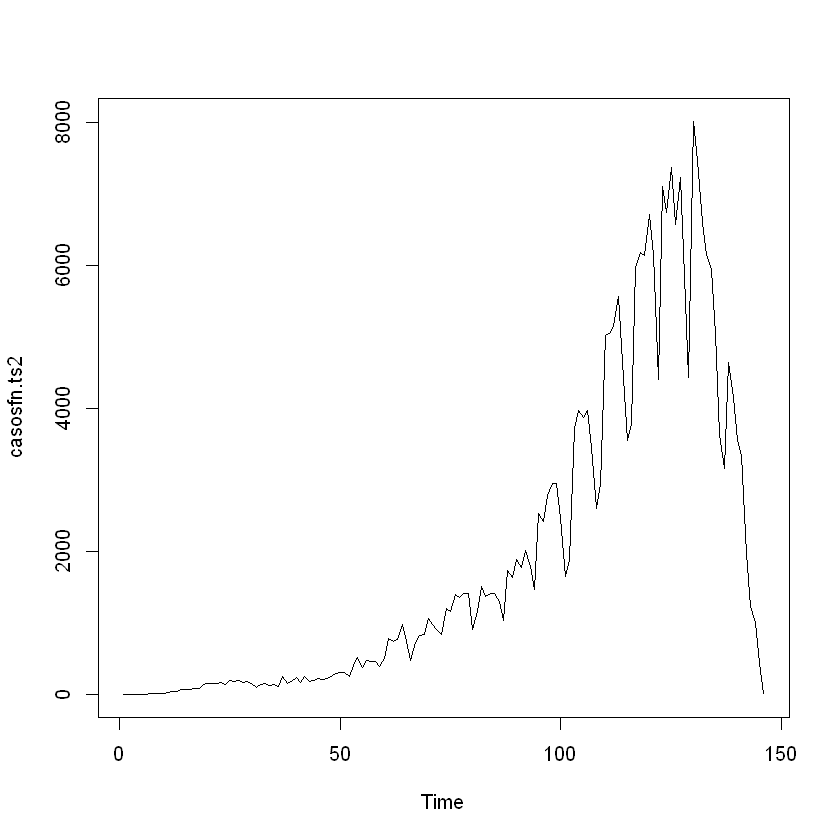

In [59]:
plot(casosfn.ts1)
plot(casosfn.ts2)

Podemos observar como la frecuencia no influye en la estructura de la serie de tiempo.

Descomponiendo la primera serie (la que posee un componente estacional)

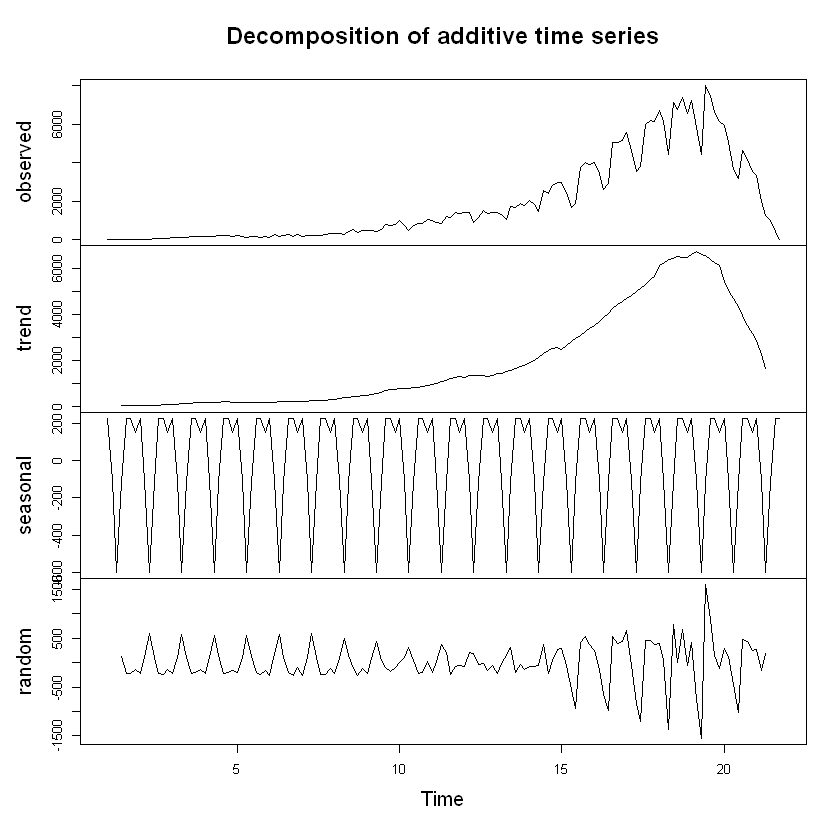

In [53]:
plot(decompose(casosfn.ts1))

El componente estacional se va haciendo cada vez mayor, luego podría plantearse modelar la serie con descomposición de tipo multiplicativa.

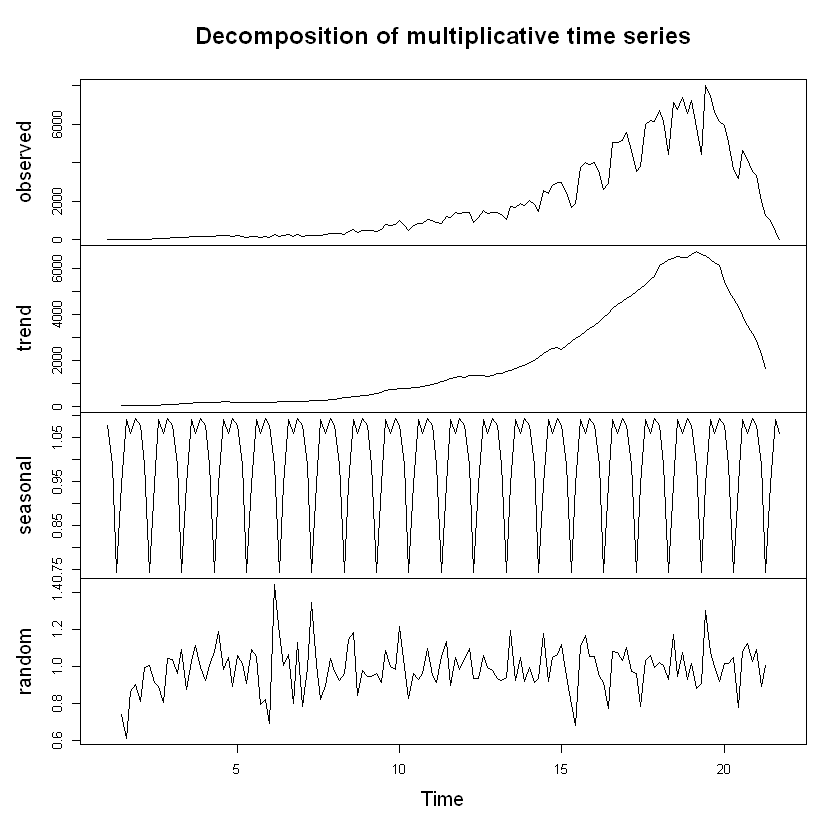

In [54]:
plot(decompose(casosfn.ts1, type = 'multiplicative'))

Se aprecia una mejoría en el componente aleatorio del modelo por descomposición multiplicativa con respecto a la descomposición clásica (aditiva).

In [62]:
auto.arima(casosfn.ts1)


Series: casosfn.ts1 
ARIMA(2,1,0)(1,0,0)[7] 

Coefficients:
          ar1      ar2    sar1
      -0.3944  -0.1941  0.6407
s.e.   0.0876   0.0839  0.0683

sigma^2 estimated as 253590:  log likelihood=-1108.33
AIC=2224.66   AICc=2224.94   BIC=2236.56

Series: casosfn.ts2 
ARIMA(0,1,0) 

sigma^2 estimated as 412155:  log likelihood=-1143.11
AIC=2288.22   AICc=2288.25   BIC=2291.2

Podemos ver que es un modelo auto-regresivo de orden 2, en donde los valores observados a la fecha de hoy están influenciados hasta por los valores observados dos días antes, se integra con los errores aunque estos no presentan ningún patrón. Además, lo observado en el día de hoy está influenciado por lo que se observó hace 7 días.

Para analizar mejor lo que está pasando, veamos las funciones de autocorrelación simple y autocorrelación parcial

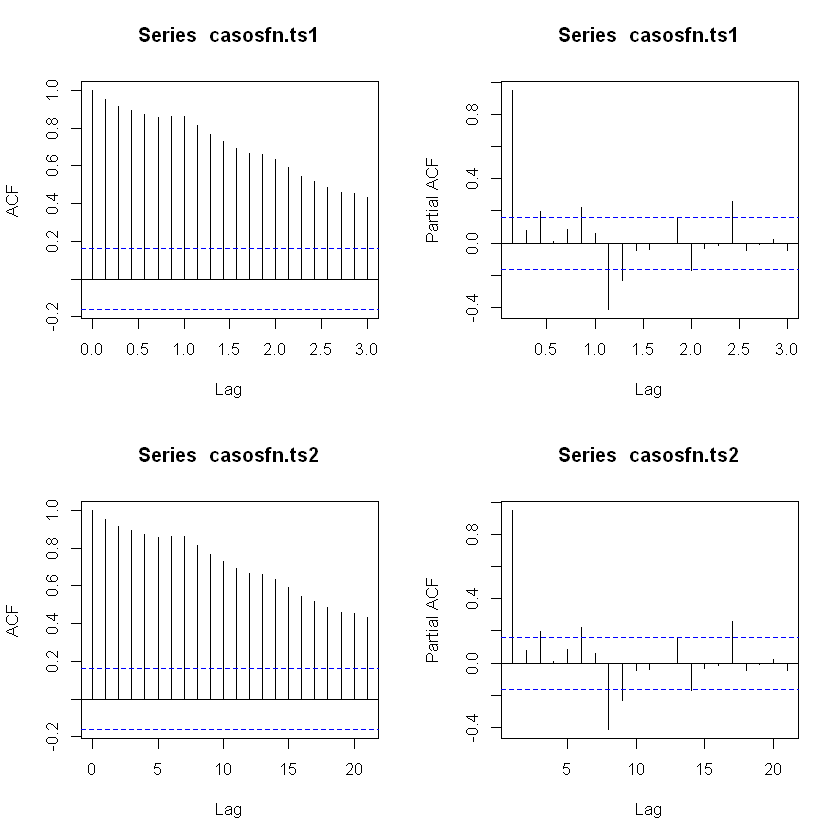

In [56]:
par(mfrow = c(2,2))
acf(casosfn.ts1) #Función de autocorrelación simple
pacf(casosfn.ts1) #Función de autocorrelación parcial
acf(casosfn.ts2)
pacf(casosfn.ts2)

Podemos observar que ambos modelos son ARIMA, sin embargo, no hay claridad en la autocorrelación parcial.

In [57]:
predict(auto.arima(casosfn.ts2),5)

ERROR while rich displaying an object: Error in if (many_rows) {: argument is of length zero

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_html.list(obj)
9. repr_list

$pred
Time Series:
Start = 147 
End = 151 
Frequency = 1 
[1] 19 19 19 19 19

$se
Time Series:
Start = 147 
End = 151 
Frequency = 1 
[1]  641.9932  907.9155 1111.9648 1283.9864 1435.5404


La predicción parece indicar que los valores van a estar fluctuando con crecimientos y decaimientos constantes.

La predicción parece señalar que los valores van a estar fluctuando con crecimientos y decaimientos constantes.
Observemos la serie en la primera diferencia para ver si se puede clarificar más el proceso.

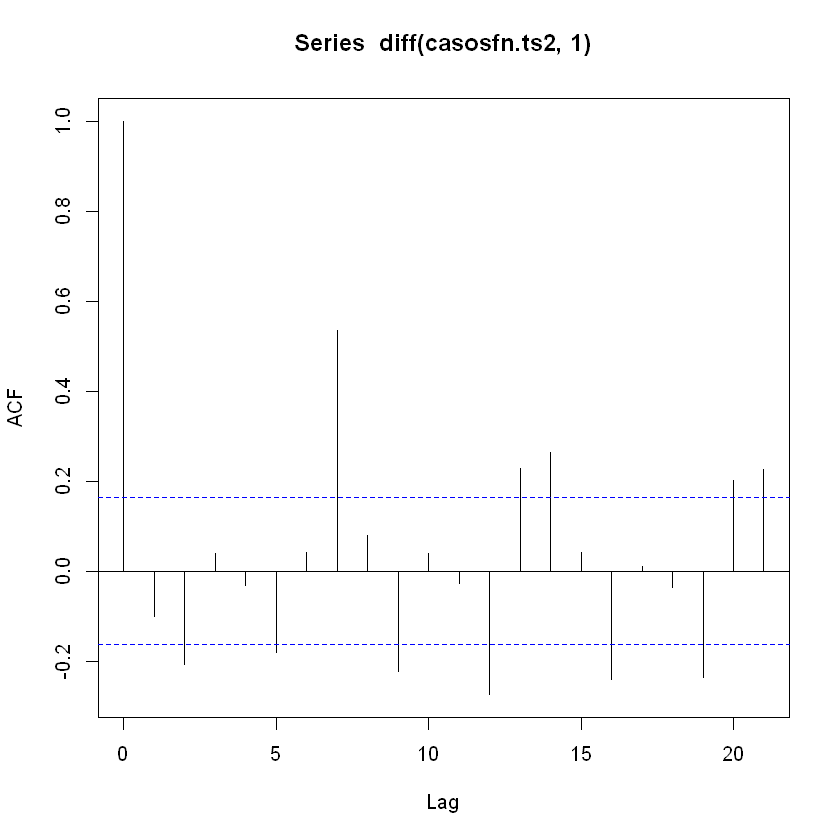

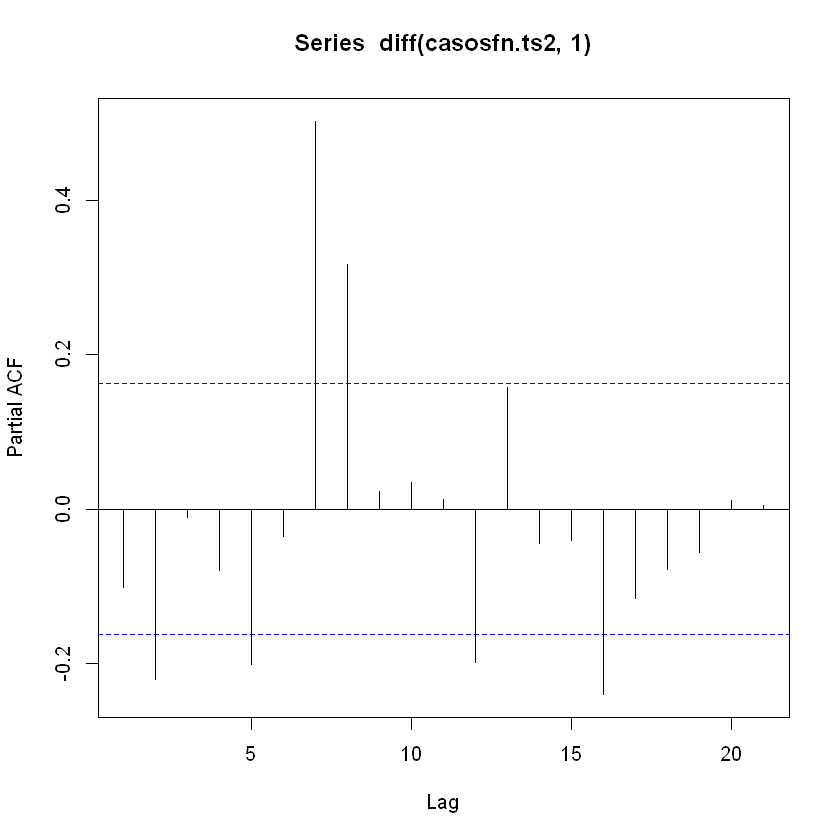

In [69]:
acf(diff(casosfn.ts2,1))
pacf(diff(casosfn.ts2,1))

In [70]:
auto.arima(diff(casosfn.ts2,1))

Series: diff(casosfn.ts2, 1) 
ARIMA(0,0,0) with zero mean 

sigma^2 estimated as 412155:  log likelihood=-1143.11
AIC=2288.22   AICc=2288.25   BIC=2291.2

Vemos como no es muy diciente, siendo mejor modelo la consideración auto-regresiva estacional.

## FECHA DE DIAGNÓSTICO

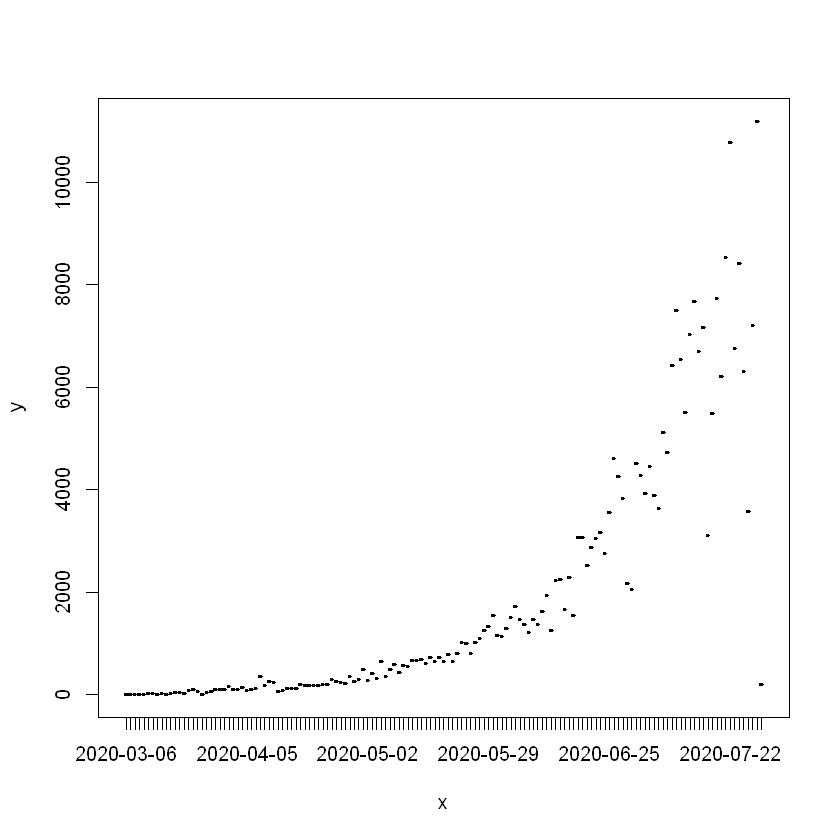

In [11]:
with(casos.fd, plot(Fecha.diagnostico, Freq))

In [12]:
freq_casos_fd <- casos.fd$Freq

In [17]:
# Estacionalidad de 7 días
freq_casos_fd.ts1 <- ts(freq_casos_fd[-1], frequency = 7)
# Sin estacionalidad
freq_casos_fd.ts2 <- ts(freq_casos_fd[-1])

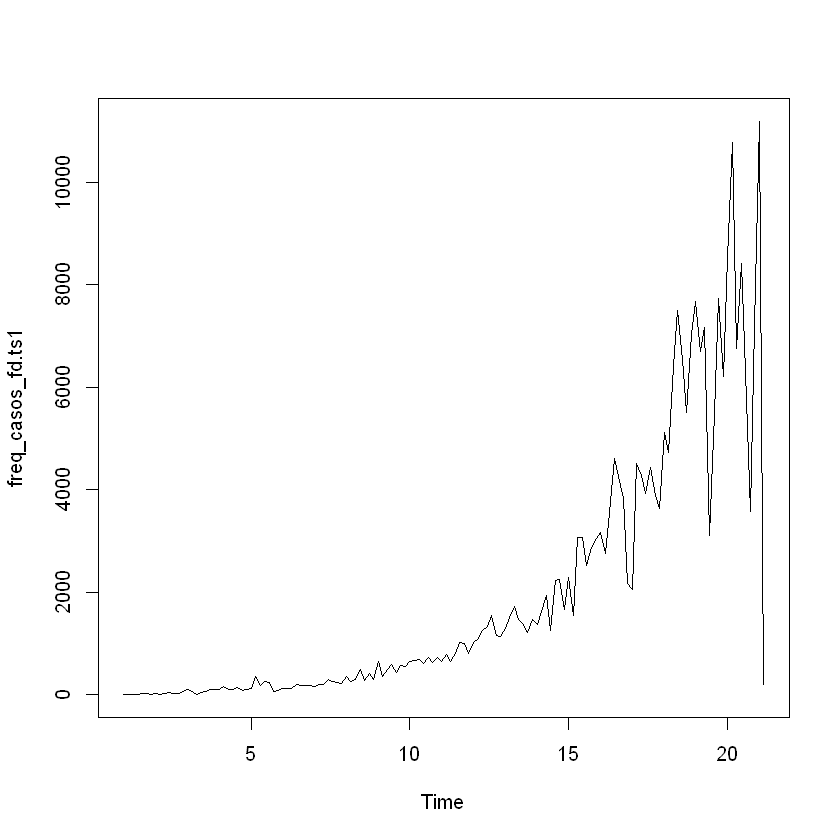

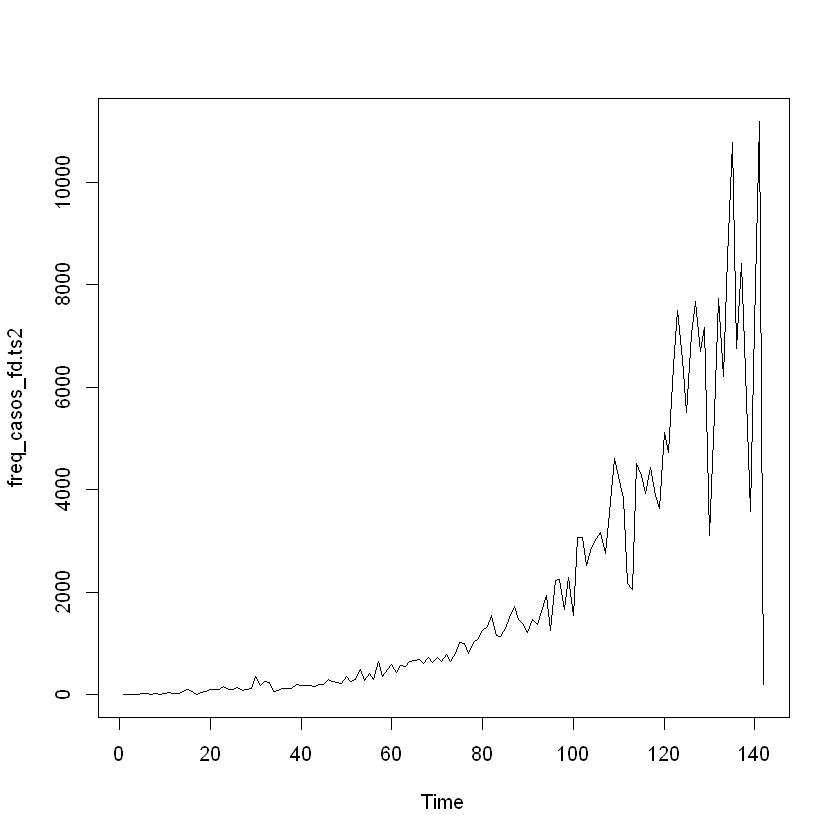

In [18]:
plot(freq_casos_fd.ts1)
plot(freq_casos_fd.ts2)

Se puede observar que la frecuencia no influye en la gráfica de series de tiempo.

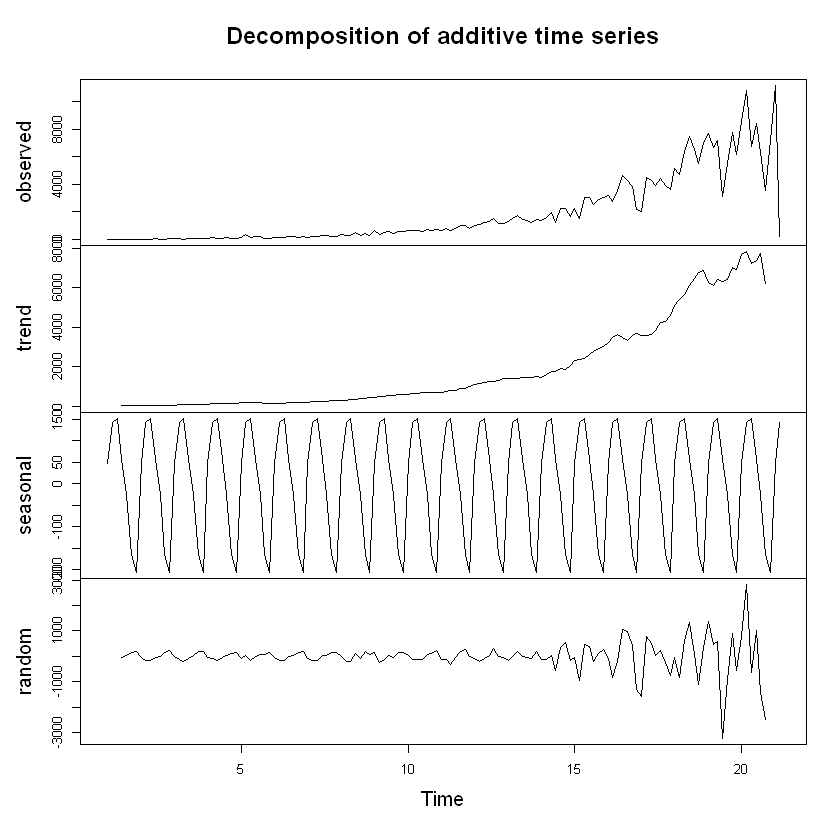

In [19]:
plot(decompose(freq_casos_fd.ts1))

In [20]:
args(decompose)

function (x, type = c("additive", "multiplicative"), filter = NULL) 
NULL

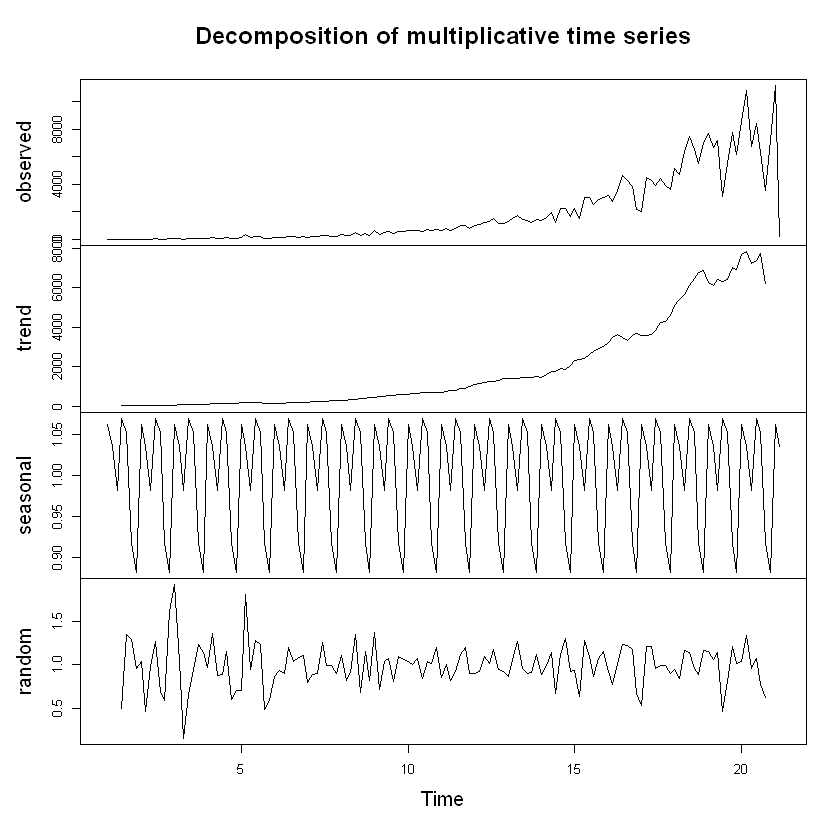

In [21]:
plot(decompose(freq_casos_fd.ts1, type = 'multiplicative'))

In [22]:
auto.arima(freq_casos_fd.ts1)
auto.arima(freq_casos_fd.ts2)

Series: freq_casos_fd.ts1 
ARIMA(2,1,0) 

Coefficients:
          ar1      ar2
      -0.6227  -0.7469
s.e.   0.0917   0.0915

sigma^2 estimated as 1089612:  log likelihood=-1179.99
AIC=2365.98   AICc=2366.16   BIC=2374.83

Series: freq_casos_fd.ts2 
ARIMA(2,1,0) 

Coefficients:
          ar1      ar2
      -0.6227  -0.7469
s.e.   0.0917   0.0915

sigma^2 estimated as 1089612:  log likelihood=-1179.99
AIC=2365.98   AICc=2366.16   BIC=2374.83

Vemos como es un modelo auto-regresivo de orden 2, además, no hubo ninguna diferencia en la periodicidad de estacionalidad con el modelo que no tiene estacionalidad, es decir, puede que no se esté presentando dicho componente estacional, esto es, los datos observados un día específico están influenciados por los datos observados con anterioridad. Además, se integra con los errores aunque estos no presentan ningún patrón

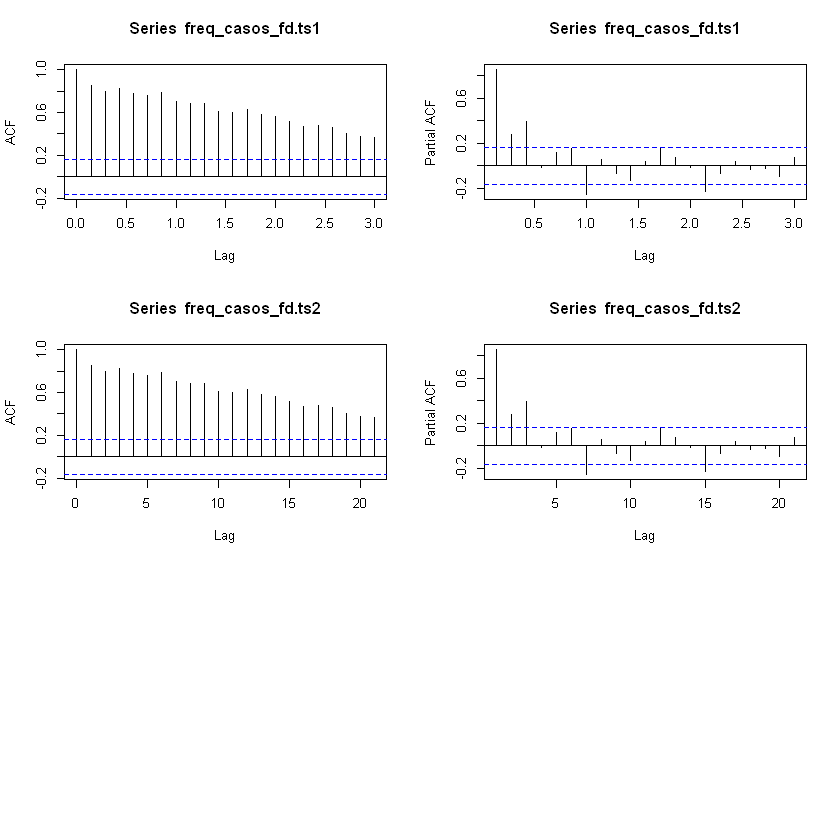

In [23]:
par(mfrow = c(3,2))
acf(freq_casos_fd.ts1)
pacf(freq_casos_fd.ts1)
acf(freq_casos_fd.ts2)
pacf(freq_casos_fd.ts2)

Podemos observar que ambos modelos son ARIMA, tampoco se identifica un componente estacional.

In [67]:
predict(auto.arima(freq_casos_fd.ts2),5)

ERROR while rich displaying an object: Error in if (many_rows) {: argument is of length zero

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_html.list(obj)
9. repr_list

$pred
Time Series:
Start = 143 
End = 147 
Frequency = 1 
[1] 4060.890 9864.633 3365.703 3077.623 8110.964

$se
Time Series:
Start = 143 
End = 147 
Frequency = 1 
[1] 1043.845 1115.685 1115.846 1337.739 1454.211


La predicción parece señalar que los valores van a estar fluctuando.
Observemos la serie en la primera diferencia para ver si se puede clarificar más el proceso.

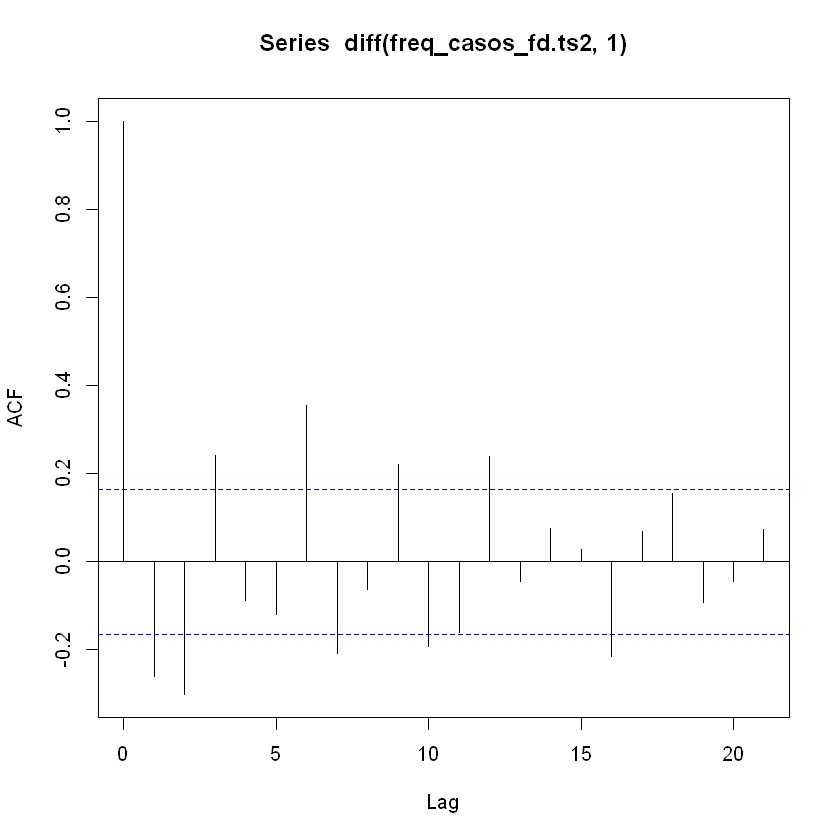

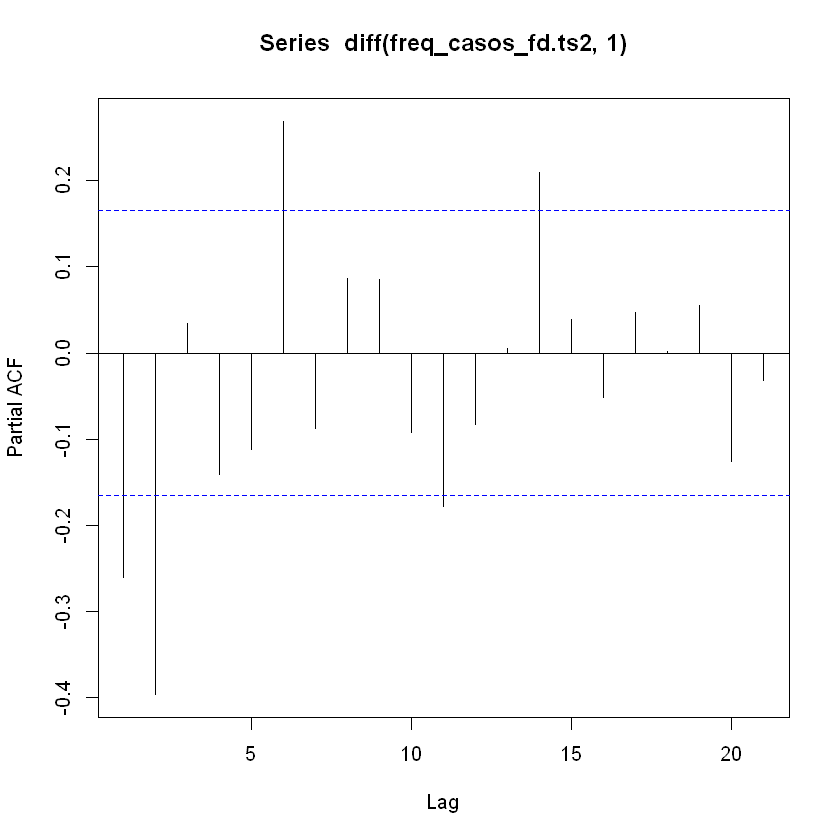

In [68]:
acf(diff(freq_casos_fd.ts2,1))
pacf(diff(freq_casos_fd.ts2,1))

In [26]:
auto.arima(diff(freq_casos_fd.ts2,1))

Series: diff(freq_casos_fd.ts2, 1) 
ARIMA(2,0,0) with zero mean 

Coefficients:
          ar1      ar2
      -0.6227  -0.7469
s.e.   0.0917   0.0915

sigma^2 estimated as 1089612:  log likelihood=-1179.99
AIC=2365.98   AICc=2366.16   BIC=2374.83

Vemos como el modelo obtenido a partir de la primera diferencia nos proporciona practicamente el mismo modelo obtenido con anterioridad, incluso con los mismos valores de AIC y BIC.

## FECHA REPORTE WEB

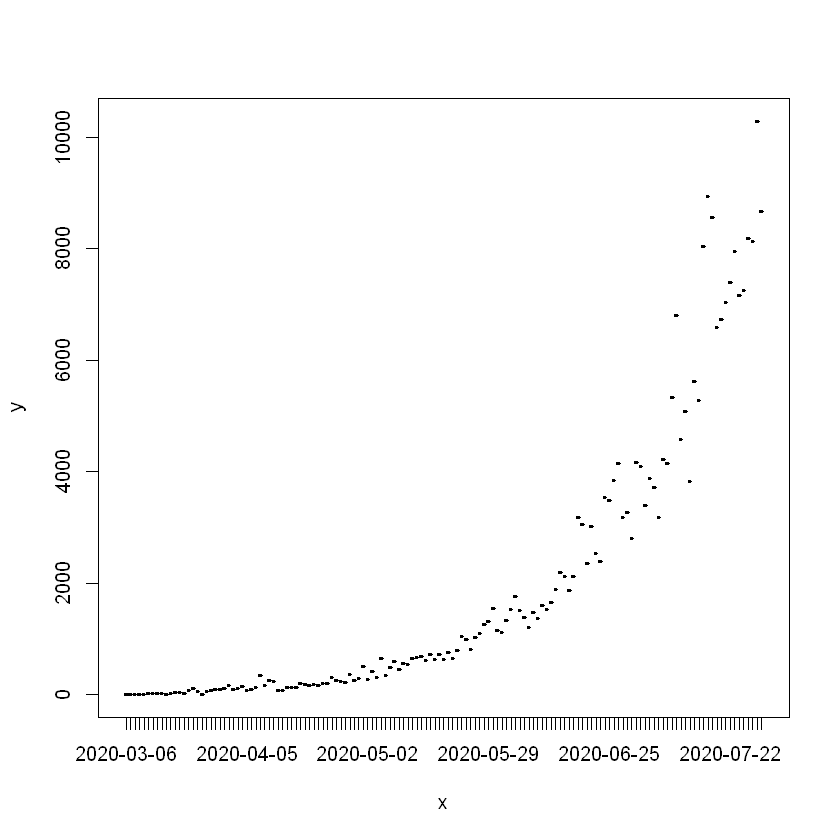

In [36]:
with(casos.frw, plot(fecha.reporte.web, Freq))

Se puede apreciar un aumento en los reportes web.

In [37]:
casosfrw <- casos.frw$Freq

In [38]:
casosfrw.ts1<-ts(casosfrw[-1], frequency = 7)
casosfrw.ts2<-ts(casosfrw[-1])

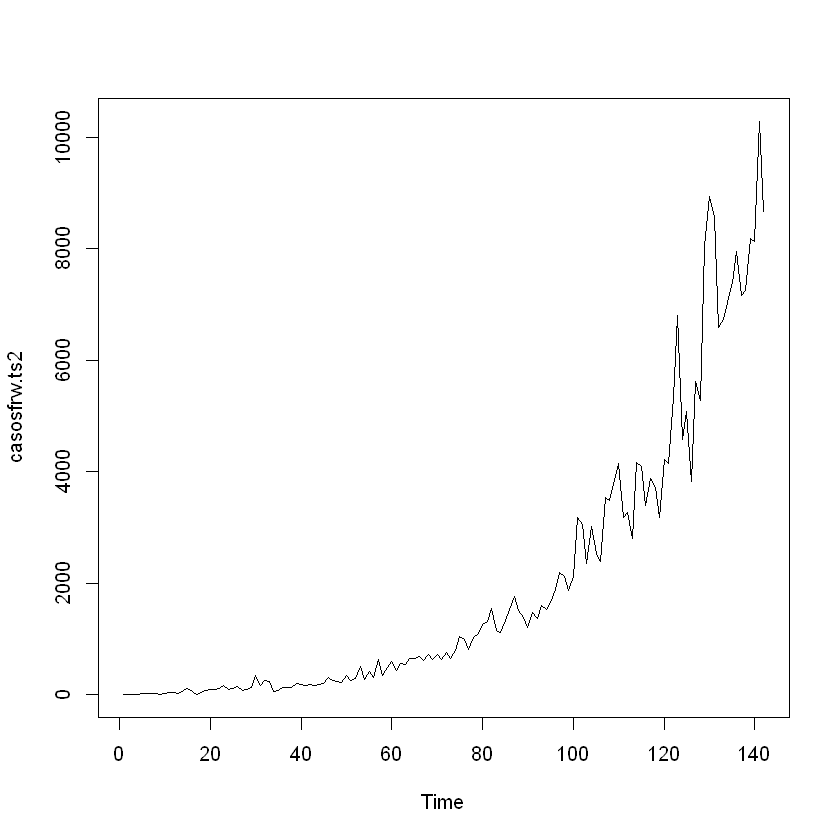

In [39]:
plot(casosfrw.ts2)

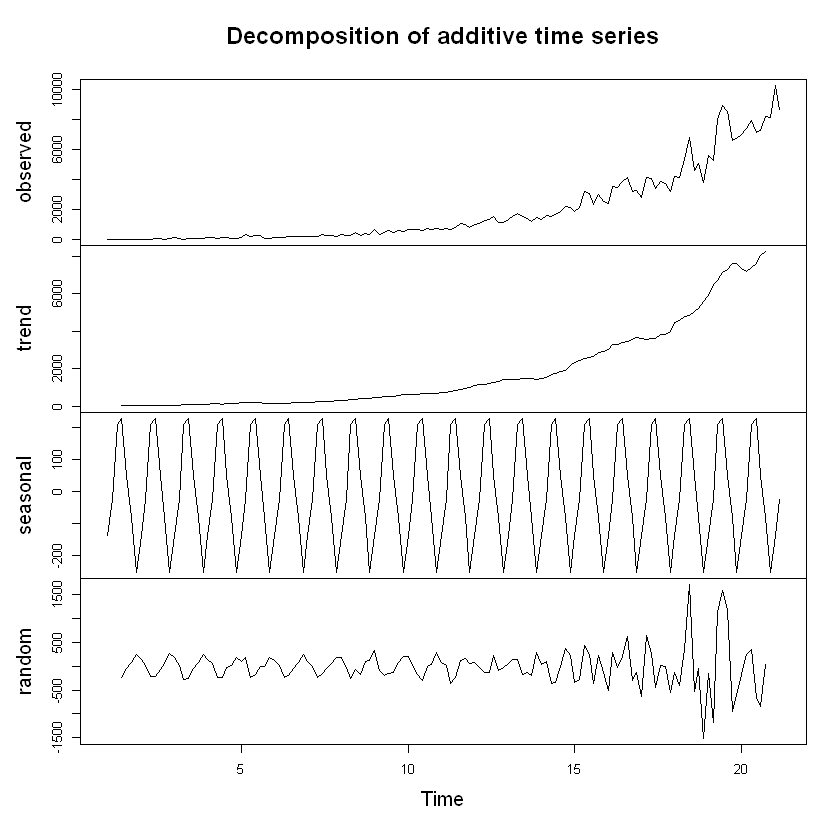

In [40]:
plot(decompose(casosfrw.ts1))

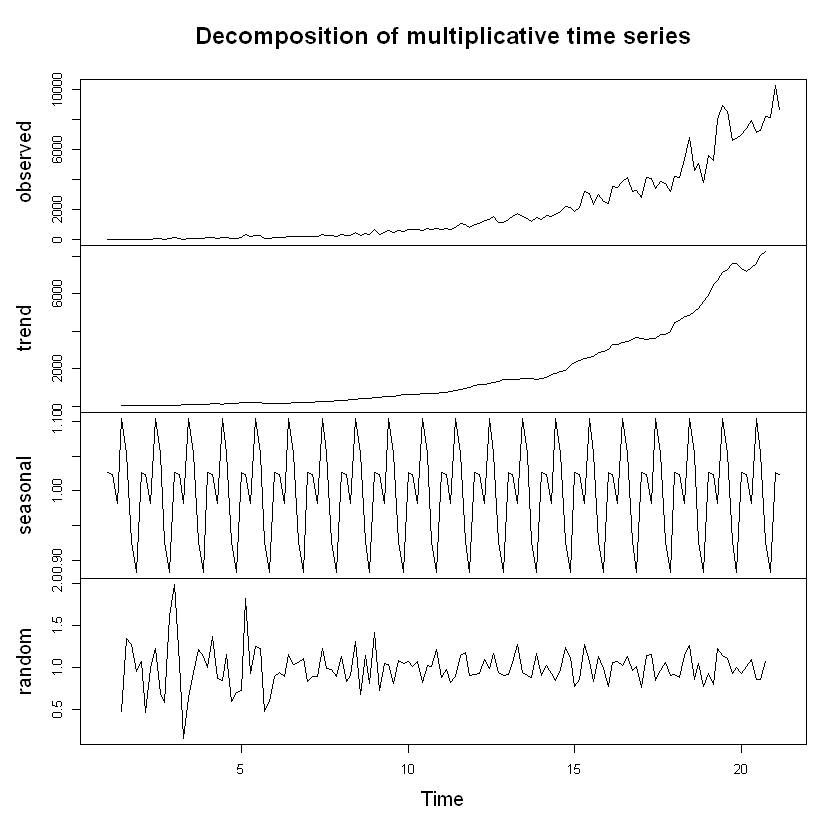

In [41]:
plot(decompose(casosfrw.ts1, type = 'multiplicative'))

In [42]:
auto.arima(casosfrw.ts1)
auto.arima(casosfrw.ts2)

Series: casosfrw.ts1 
ARIMA(1,1,1)(1,0,1)[7] with drift 

Coefficients:
         ar1      ma1     sar1    sma1    drift
      0.3066  -0.7291  -0.5499  0.8882  61.7615
s.e.  0.1270   0.0799   0.1421  0.1055  20.4220

sigma^2 estimated as 263201:  log likelihood=-1079.55
AIC=2171.11   AICc=2171.73   BIC=2188.8

Series: casosfrw.ts2 
ARIMA(1,1,1) with drift 

Coefficients:
         ar1      ma1    drift
      0.3840  -0.7295  62.1318
s.e.  0.1207   0.0785  20.0147

sigma^2 estimated as 290231:  log likelihood=-1085.46
AIC=2178.93   AICc=2179.22   BIC=2190.72

Podemos observar que se trata también de un modelo auto-regresivo de orden 2. Sin embargo, pese a ser un modelo estacional de orden 7, los valores observados no parecen estar muy influenciados (-0.5499).

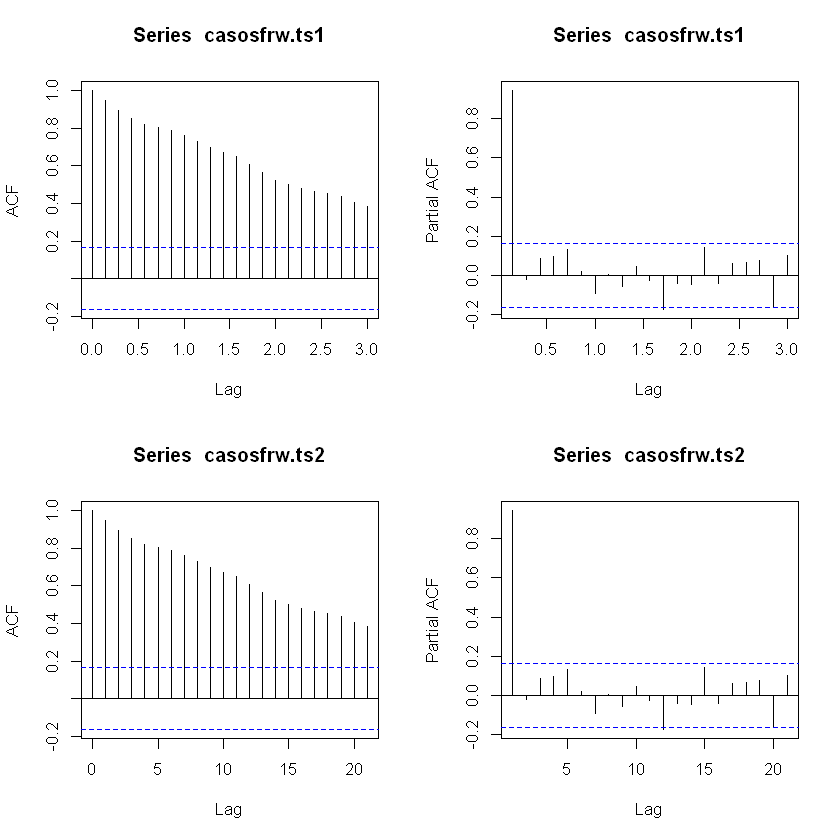

In [43]:
par(mfrow = c(2,2))
acf(casosfrw.ts1)
pacf(casosfrw.ts1)
acf(casosfrw.ts2)
pacf(casosfrw.ts2)

Podemos observar que ambos modelos son ARIMA, tampoco se identifica un componente estacional.

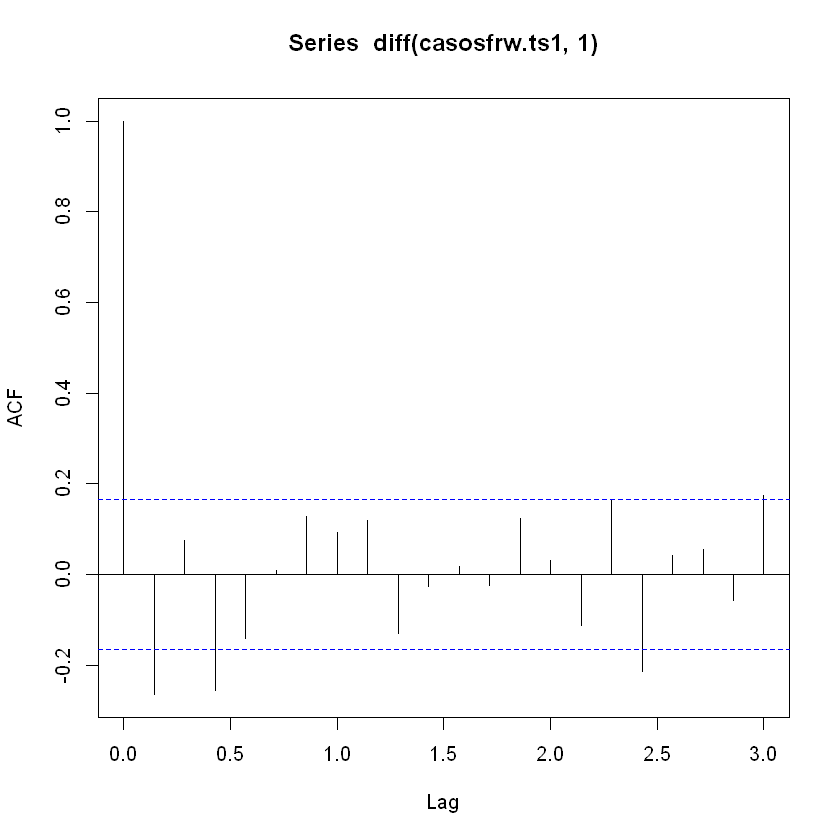

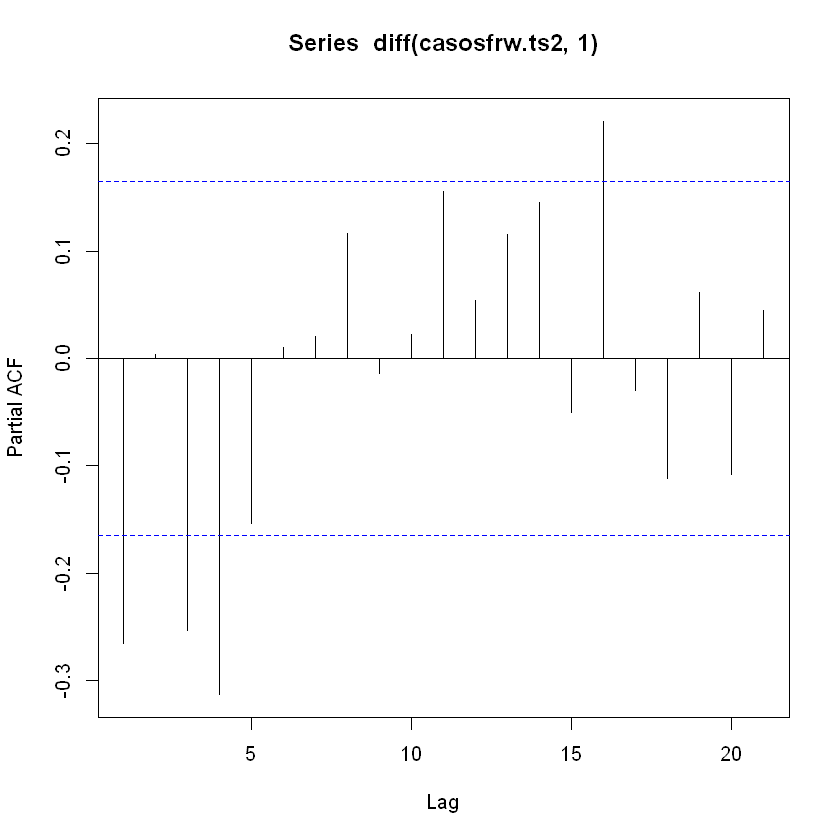

In [45]:
acf(diff(casosfrw.ts1,1))
pacf(diff(casosfrw.ts2,1))

In [71]:
auto.arima(diff(casosfrw.ts2,1))

Series: diff(casosfrw.ts2, 1) 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1      ma1     mean
      0.3840  -0.7295  62.1318
s.e.  0.1207   0.0785  20.0147

sigma^2 estimated as 290231:  log likelihood=-1085.46
AIC=2178.93   AICc=2179.22   BIC=2190.72

Vemos como se trata de un modelo auto-regresivo de orden 1.

## Ejercicio 2 - Métodos No Paramétricos en Estadística

Con base en los datos trabajados en el módulo de muestreo (archivo adjunto en el enlace) extraiga una muestra representativa (calcule el tamaño para un nivel de confianza de 89% y un error de 3% y use ese tamaño específico) y determine si la clasificación en niveles de desempeño en dos de las cinco competencias genéricas son producto del azar o no.

Determine si esos resultados son independientes o dependientes entre sí.

Con la muestra, calcule un promedio general por estudiante para las cinco competencia y realice un ranking inicial y un ranking final por departamento; determine si hubo cambios significativos en esa clasificación

[Descargue el archivo aquí](https://www.dropbox.com/s/xgsf3l5gjw0h0q4/saberpro.RData?dl=1)

### Librerías

In [1]:
install.packages('coin')

also installing the dependencies 'TH.data', 'sandwich', 'libcoin', 'matrixStats', 'modeltools', 'multcomp'



package 'TH.data' successfully unpacked and MD5 sums checked
package 'sandwich' successfully unpacked and MD5 sums checked
package 'libcoin' successfully unpacked and MD5 sums checked
package 'matrixStats' successfully unpacked and MD5 sums checked
package 'modeltools' successfully unpacked and MD5 sums checked
package 'multcomp' successfully unpacked and MD5 sums checked
package 'coin' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\David\AppData\Local\Temp\RtmpAZf1Bo\downloaded_packages


In [2]:
library(devtools)
library(plyr) #Librería necesaria para revalue
library(samplingbook)
library(SamplingUtil) 
library(magrittr) # Permite leer la función %>%
library(dplyr) # Contiene la función select
library(coin)

Warning message:
"package 'devtools' was built under R version 3.6.3"Loading required package: usethis
Warning message:
"package 'usethis' was built under R version 3.6.3"Warning message:
"package 'samplingbook' was built under R version 3.6.3"Loading required package: pps
Loading required package: sampling
Warning message:
"package 'sampling' was built under R version 3.6.3"Loading required package: survey
Warning message:
"package 'survey' was built under R version 3.6.3"Loading required package: grid
Loading required package: Matrix
Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.3"
Attaching package: 'survival'

The following objects are masked from 'package:sampling':

    cluster, strata


Attaching package: 'survey'

The following object is masked from 'package:graphics':

    dotchart


Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, s

### Preprocesamiento de los datos

In [3]:
load(url('https://www.dropbox.com/s/xgsf3l5gjw0h0q4/saberpro.RData?dl=1')) #Se cargan los datos

In [4]:
ls()
dim(sp161718) #dimensiones Dataframe
names(sp161718) #Nombres Variables

[1] "sp161718"

[1] 725295     16

[1] "periodo"                 "apli_consecutivo"       
 [3] "estu_depto_reside"       "estu_cod_reside_depto"  
 [5] "inst_cod_institucion"    "inst_nombre_institucion"
 [7] "raz_cuant_punt"          "raz_cuant_des"          
 [9] "lect_crit_punt"          "lect_crit_des"          
[11] "comp_ciud_punt"          "comp_ciud_des"          
[13] "ingles_punt"             "ingles_desem"           
[15] "comu_escr_punt"          "comu_escr_des"

In [5]:
data<-data.frame(index = 1:nrow(sp161718),
                 Periodo=sp161718$periodo, 
                 Departamento=sp161718$estu_depto_reside,
                 RazonamientoPunt=sp161718$raz_cuant_punt, 
                 RazonamientoDes=sp161718$raz_cuant_des,
                 LecturaP=sp161718$lect_crit_punt, 
                 LecturaDes=sp161718$lect_crit_des, 
                 CompetenciasPunt=sp161718$comp_ciud_punt, 
                 CompetenciasDest=sp161718$comp_ciud_des, 
                 InglesPunt=sp161718$ingles_punt,
                 InglesDes=sp161718$ingles_desem,
                 ComunicacionPunt=sp161718$comu_escr_punt, 
                 ComunicacionDes=sp161718$comu_escr_des) #Nuevo Dataframe a usar

In [6]:
temp<-factor(data$Periodo) #vamos a cambiar el periodo para solo tener en cuenta el año
data$Periodo<-revalue(temp, c("20163"="2016", "20162"="2016", "20173"="2017", "20172"="2017","20183"="2018","20182"="2018","20184"="2018")) #Uso de revalue
temp<-factor(data$Departamento)#eliminamos la ñ para evitar problemas de compilacion
data$Departamento<-revalue(temp, c("NARIÃ‘O"="NARINO", "NARIÃƒâ\200\230O"="NARINO"))
data <- na.omit(data) 
data$RazonamientoDes = as.factor(data$RazonamientoDes) 
data$LecturaDes = as.factor (data$LecturaDes) 
data$CompetenciasDest = as.factor(data$CompetenciasDest) 
data$InglesDes = as.factor(data$InglesDes) 
data$ComunicacionDes = as.factor(data$ComunicacionDes)

In [7]:
head(data)

index,Periodo,Departamento,RazonamientoPunt,RazonamientoDes,LecturaP,LecturaDes,CompetenciasPunt,CompetenciasDest,InglesPunt,InglesDes,ComunicacionPunt,ComunicacionDes
1,2016,ATLANTICO,160,3,130,2,167,3,160,A2,155,3
2,2016,CUNDINAMARCA,138,2,132,2,77,1,125,A1,164,3
3,2016,CALDAS,146,2,157,2,150,2,104,A1-,122,2
4,2016,MAGDALENA,160,3,172,3,151,2,160,A2,192,4
5,2016,CORDOBA,130,2,122,1,144,2,192,B1,131,2
6,2016,CAUCA,159,3,129,2,147,2,108,A1-,154,3


### Muestra

Se toma una muestra representativa con un nivel de confianza del 89% y un error de 3%, usando muestreo aleatorio simple

In [8]:
tmuestra<-sample.size.prop(e=0.03, P = 0.5, N = nrow(data), level = 0.89)$n
print(tmuestra)

[1] 709


In [9]:
mas<- sample(1:nrow(data),size=tmuestra,replace=FALSE) #Se realiza el MAS
tmas<-data[mas,]
head(mas)
head(tmas)

[1] 423376 341130 415072  21523 628833 259233

,index,Periodo,Departamento,RazonamientoPunt,RazonamientoDes,LecturaP,LecturaDes,CompetenciasPunt,CompetenciasDest,InglesPunt,InglesDes,ComunicacionPunt,ComunicacionDes
435503,435503,2017,SANTANDER,88,1,98,1,119,1,128,A1,127,2
349063,349063,2017,BOGOTA,110,1,129,2,155,2,115,A1-,134,2
426749,426749,2017,BOGOTA,164,3,198,3,168,3,154,A2,178,3
21759,21759,2016,BOGOTA,196,3,168,3,163,3,198,B1,194,4
648500,648500,2018,BOGOTA,150,2,125,2,155,2,115,A1-,181,3
263077,263077,2017,CUNDINAMARCA,138,2,124,1,116,1,127,A1,161,3


#### Determine si la clasificación en niveles de desempeño en dos de las cinco competencias genéricas son producto del azar o no.

Las hipótesis :

* $H_{0}:$ No hay diferencia entre las proporciones de las categorías.
* $H_{1}:$ Existe diferencia entre las proporciones de las categorías.

### Razonamiento Cuantitativo

In [10]:
RC<- tmas
RC<- data.frame(RC$RazonamientoDes)
table(RC)

RC
  1   2   3   4 
167 238 276  28 

prueba

In [11]:
chisq.test(table(RC))


	Chi-squared test for given probabilities

data:  table(RC)
X-squared = 202.1, df = 3, p-value < 2.2e-16


In [12]:
with(chisq.test(table(RC)), data.frame(observed,expected))

RC,Freq,expected
1,167,177.25
2,238,177.25
3,276,177.25
4,28,177.25


Debido al valor de p-value(menor a  $\alpha=0.05$) se rechaza la hipotesis nula en la competencia de Razonamiento Cuantitativo,y debido a esto existe una diferencia entre las proporciones de las categorias, por lo cual se concluye que los datos no son producto del azar, Tambien se puede observar una mayor frecuencia en los niveles de desempeño 2 y 3.

### Lectura Critica

In [13]:
LC<- tmas
LC<-data.frame(LC$LecturaDes)
table(LC)

LC
  1   2   3   4 
159 254 256  40 

Prueba:

In [14]:
chisq.test(table(LC)) 


	Chi-squared test for given probabilities

data:  table(LC)
X-squared = 176.38, df = 3, p-value < 2.2e-16


In [15]:
with(chisq.test(table(LC)), data.frame(observed,expected))

LC,Freq,expected
1,159,177.25
2,254,177.25
3,256,177.25
4,40,177.25


Debido al valor de p-value(menor a  $\alpha=0.05$) se rechaza la hipotesis nula,y  se concluye que las competencias de Razonamiento Cuantitativo y la competencia de Lectura Critica son dependientes entre si.

#### Con la muestra, calcule un promedio general por estudiante para las cinco competencia y realice un ranking inicial y un ranking final por departamento; determine si hubo cambios significativos en esa clasificación.

Las hipótesis:

* $H_{0}: mediana = 0$
* $H_{1}: mediana \neq 0$

Agrupación por año y departamento con el promedio de puntajes, y separación de cada periodo

In [16]:
promedio <- data.frame(
  Periodo = data$Periodo,
  Departamento = data$Departamento,
  Promedio = with(data, (CompetenciasPunt+ComunicacionPunt+InglesPunt+LecturaP+RazonamientoPunt)/5)
)

departamentos <- promedio %>%
  select(Departamento,Periodo,Promedio) %>%
  group_by(Departamento,Periodo) %>%
  summarise(Puntaje=mean(Promedio))

periodo2016<-departamentos[departamentos$Periodo=='2016',c('Departamento','Puntaje')]
periodo2017<-departamentos[departamentos$Periodo=='2017',c('Departamento','Puntaje')]
periodo2018<-departamentos[departamentos$Periodo=='2018',c('Departamento','Puntaje')]

Se ordenan los departamentos con un ranking dependiente del puntaje de cada uno y luego se vuelven a ordenar por departamento para así poder ver las variaciones de cada departamento y puntaje en cada periodo o año.

In [17]:
p2016<-periodo2016 %>% arrange(desc(Puntaje))
p2017<-periodo2017 %>% arrange(desc(Puntaje))
p2018<-periodo2018 %>% arrange(desc(Puntaje))

p2016$puesto  <- 1:nrow(p2016)
p2017$puesto  <- 1:nrow(p2017)
p2018$puesto  <- 1:nrow(p2018)

p2016 <- p2016[order(p2016$Departamento),]
p2017 <- p2017[order(p2017$Departamento),]
p2018 <- p2018[order(p2018$Departamento),]

In [18]:
ord<- data.frame(Departamento=p2016$Departamento,Puesto2016=p2016$puesto,Puesto2017= p2017$puesto,Puesto2018=p2018$puesto)
ord

Departamento,Puesto2016,Puesto2017,Puesto2018
,35,1,12
AMAZONAS,26,25,26
ANTIOQUIA,2,4,3
ARAUCA,29,32,29
ATLANTICO,10,12,11
BOGOTA,1,3,2
BOLIVAR,20,13,13
BOYACA,6,7,6
CALDAS,3,6,5
CAQUETA,22,28,28


In [19]:
wilcoxsign_test(p2016$puesto ~ p2017$puesto,  distribution = "exact")


	Exact Wilcoxon-Pratt Signed-Rank Test

data:  y by x (pos, neg) 
	 stratified by block
Z = -1.5631, p-value = 0.12
alternative hypothesis: true mu is not equal to 0


In [20]:
wilcoxsign_test(p2017$puesto ~ p2018$puesto,  distribution = "exact")


	Exact Wilcoxon-Pratt Signed-Rank Test

data:  y by x (pos, neg) 
	 stratified by block
Z = 1.1865, p-value = 0.241
alternative hypothesis: true mu is not equal to 0


In [21]:
wilcoxsign_test(p2016$puesto ~ p2018$puesto,  distribution = "exact")


	Exact Wilcoxon-Pratt Signed-Rank Test

data:  y by x (pos, neg) 
	 stratified by block
Z = -1.5064, p-value = 0.1345
alternative hypothesis: true mu is not equal to 0


In [22]:
summary(promedio)

 Periodo             Departamento       Promedio    
 2016:239830   BOGOTA      :205650   Min.   : 14.0  
 2017:233791   ANTIOQUIA   : 84126   1st Qu.:132.4  
 2018:229560   VALLE       : 54452   Median :147.6  
               ATLANTICO   : 39878   Mean   :149.2  
               CUNDINAMARCA: 38129   3rd Qu.:164.6  
               SANTANDER   : 35313   Max.   :268.8  
               (Other)     :245633                  

Se observa que el p-valor obtenido para cada una de las pruebas es mayor que $\alpha=0.05$, entonces no se rechaza la hipótesis nula. Por lo tanto, podemos afirmar que en el ranking y pruebas aplicadas para 2016-2017, 2017-2018 y 2016-2018 se tiene una mediana diferente de cero y con cambios en la mayoria de los puestos de los departamentos. Para comprobarlo, se puede observar la tabla que se generó anteriormente sobre los puestos y se observa que efectivamente la mediana cambio de posición superando más del 50% en los puestos asignados a los departamentos.

##Ejercicio 3 - Diseño de experimentos


Plantee un ejercicio, a su gusto, donde sea posible hacer uso de los distintos tipos de Diseño de Experimentos:


*   ANOVA de un Factor (Efectos Fijos)
*   Anova de un Factor (Efectos Aleatorios)
*   Diseño por Bloques
*   Diseño Factorial (Dos Factores)
*   Cuadrado Latino



### ANOVA - Efectos Fijos

Los miembros de un equipo ciclista se dividen al azar en cuatro grupos que entrenan con métodos diferentes. El primer grupo realiza largos recorridos a ritmo pausado, el segundo grupo realiza series cortas de alta intensidad, el tercero trabaja en el gimnasio con pesas y se ejercita en el pedaleo de alta frecuencia, y el cuarto realiza ejercicios intensos a un ritmo moderado. Después de un mes de entrenamiento se realiza un test de rendimiento consistente en un recorrido cronometrado de 9 Km. A un nivel de confianza del 95% ¿Puede considerarse que los tres métodos producen resultados equivalentes? O por el contrario ¿Hay algún método superior a los demás?. Los tiempos empleados fueron los siguientes:

In [23]:
#Conjunto de datos
input1 = (" Metodo Resultado
'1'  15
'1'  16
'1'  16
'1'  15
'1'  17
'2'  14
'2'  15
'2'  15
'2'  16
'2'  14
'3'  13
'3'  12
'3'  11
'3'  15
'3'  11
'4'  13
'4'  14
'4'  12
'4'  13
'4'  11
")

datos1<-read.table(textConnection(input1),header=TRUE)
head(datos1)

Metodo,Resultado
1,15
1,16
1,16
1,15
1,17
2,14


Por lo tanto la hipótesis es:

\begin{equation}
H_{0} : \tau_{j} = 0 , \quad j=1,2,...,4.
\end{equation}

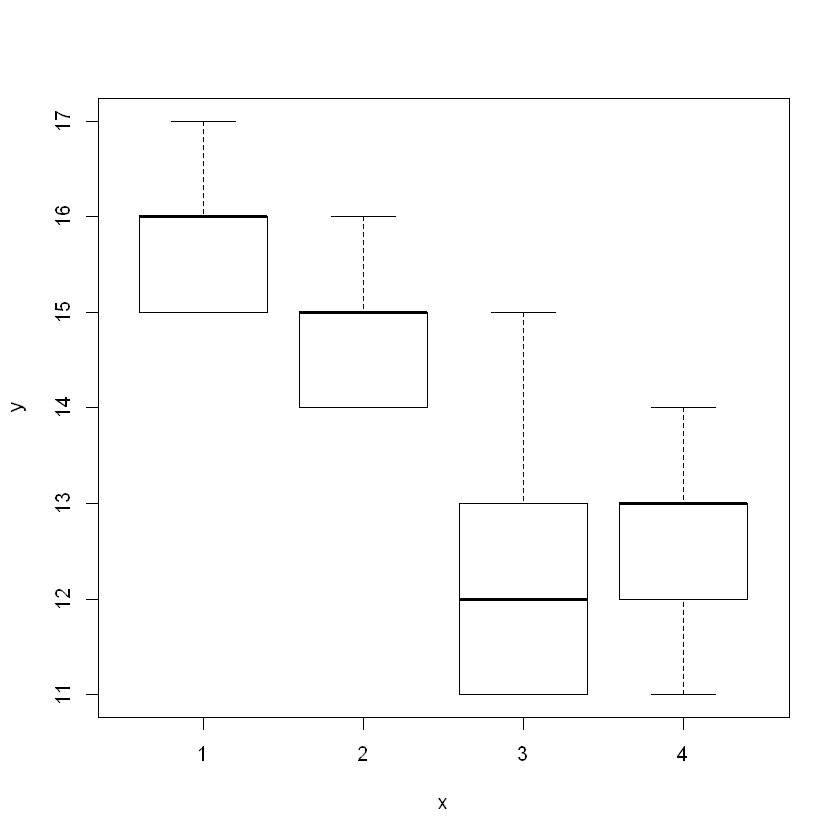

In [24]:
#Gráfica
datos1$Metodo<-factor(datos1$Metodo)
with(datos1, plot(Metodo,Resultado))

Con la gráfica se puede observar que los métodos tienen diferentes medias, y que los métodos 1 y 2 suelen presentar resultados de rendimiento más similares por lo que tienen poca desviación. Por otro lado, vemos que el 3 tiene mayor desviación y un resultado de rendimiento menor en promedio. Sin embargo, aún no podemos rechazar del todo la hipótesis nula, por lo que procedemos a agrupar la información en una tabla de de análisis de varianza para sacar una conclusión:

In [ ]:
# La ANOVA en detalle
m.aov1<-lm(Resultado~Metodo,data=datos1)
aov.m1<-aov(m.aov1)
summary(aov.m1)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Metodo       3   41.8  13.933   10.13 0.000556 ***
Residuals   16   22.0   1.375                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
summary(m.aov1)


Call:
lm(formula = Resultado ~ Metodo, data = datos1)

Residuals:
   Min     1Q Median     3Q    Max 
 -1.60  -0.80   0.20   0.45   2.60 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  15.8000     0.5244  30.129  1.6e-15 ***
Metodo2      -1.0000     0.7416  -1.348 0.196309    
Metodo3      -3.4000     0.7416  -4.585 0.000305 ***
Metodo4      -3.2000     0.7416  -4.315 0.000534 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.173 on 16 degrees of freedom
Multiple R-squared:  0.6552,	Adjusted R-squared:  0.5905 
F-statistic: 10.13 on 3 and 16 DF,  p-value: 0.0005556


Con esta tabla podemos observar el intercepto con el método 1. De igual forma, por medio del p-valor podemos notar que existen diferencias significativas con los demás métodos excepto con el número 2. 

Finalmente, realizamos el test de medias:

In [ ]:
# Test de comparación de medias:
library(stats)
pairwise.t.test(datos1$Resultado,datos1$Metodo, p.adjust.method="bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  datos1$Resultado and datos1$Metodo 

  1      2      3     
2 1.0000 -      -     
3 0.0018 0.0310 -     
4 0.0032 0.0546 1.0000

P value adjustment method: bonferroni 

In [ ]:
tk.aov.m1<-TukeyHSD(aov.m1)
tk.aov.m1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = m.aov1)

$Metodo
    diff       lwr         upr     p adj
2-1 -1.0 -3.121789  1.12178909 0.5473602
3-1 -3.4 -5.521789 -1.27821091 0.0015646
4-1 -3.2 -5.321789 -1.07821091 0.0026999
3-2 -2.4 -4.521789 -0.27821091 0.0240019
4-2 -2.2 -4.321789 -0.07821091 0.0407941
4-3  0.2 -1.921789  2.32178909 0.9928647


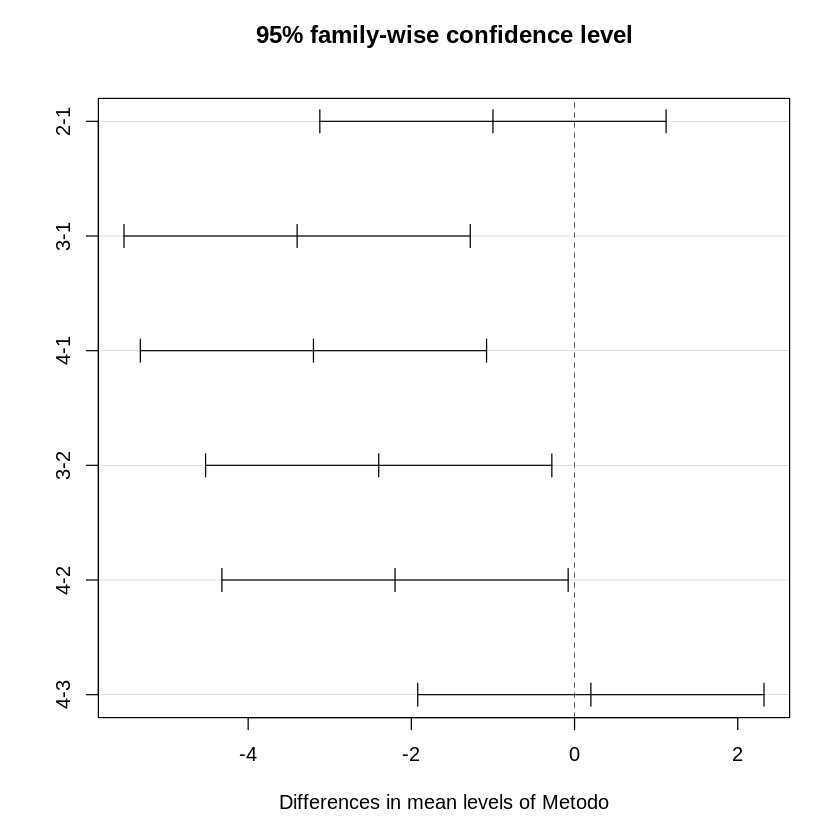

In [ ]:
plot(tk.aov.m1)

Por último, vemos que en la gráfica el 0 atraviesa más hacia el centro del intervalo de confianza en los métodos 2-1 y 4-3, por lo que se rechaza así la hipótesis nula y se concluye que los cuatro métodos de entrenamiento producen diferencias significativas.

### ANOVA - Efectos Aleatorios

Una fábrica textil produce un tipo de tela en un número grande de telares. Se desea obtener una tela de resistencia uniforme.

El ingeniero a cargo sospecha que además de la variación usual en resistencia de muestras de tela del mismo telar, puede haber variaciones en resistencia entre diferentes telares. 

Para investigar esto, selecciona al azar 4 telares y hace 4 determinaciones de resistencia en la tela producida por cada telar. El experimento se corre en orden aleatorio

| Telar 1 | Telar 2 | Telar 3 | Telar 4 |
|------|------|------| ------|
| 98    | 91    | 96   | 95 |
| 97   | 90   | 95   |  96 |
| 99   | 93   | 97 |  99  |
| 96   | 92   | 95   |   98|

La Hipótesis nula del problema es:
\begin{equation}
H_{0} : \sigma²_{\tau} = 0
\end{equation}

In [ ]:
#Conjunto de datos
Input2 = (" Telar Resistencia
'1'  98
'1'  97
'1'  99
'1'  96
'2'  91
'2'  90
'2'  93
'2'  92
'3'  96
'3'  95
'3'  97
'3'  95
'4'  95
'4'  96
'4'  99
'4'  98
")

datos2<-read.table(textConnection(Input2),header=TRUE)
head(datos2)

,Telar,Resistencia
,<int>,<int>
1,1,98
2,1,97
3,1,99
4,1,96
5,2,91
6,2,90


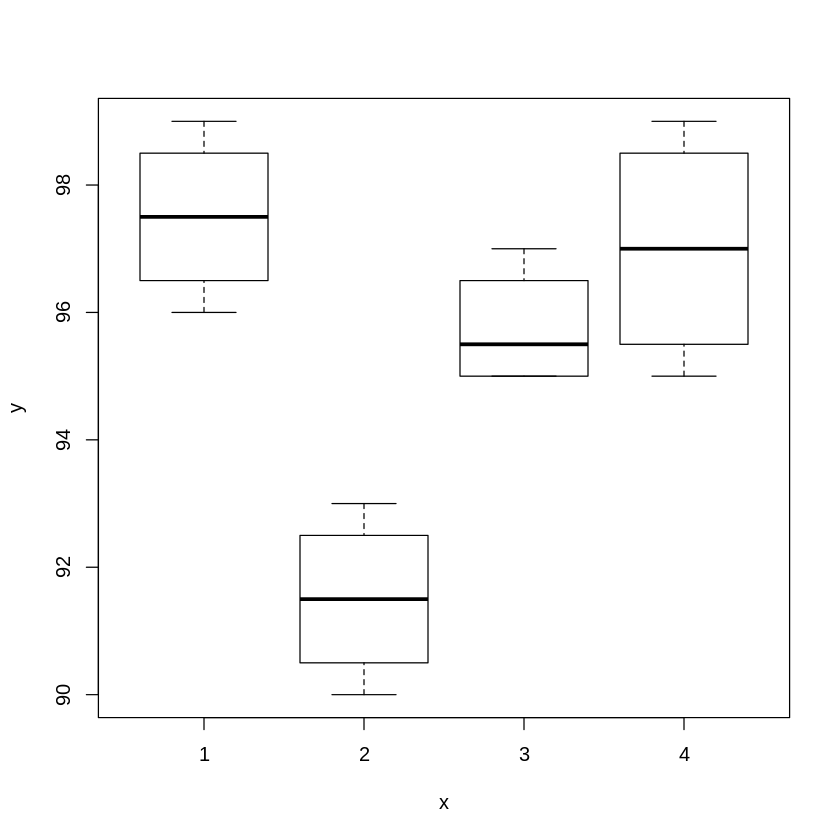

In [ ]:
#Gráfica
datos2$Telar<-factor(datos2$Telar)
with(datos2, plot(Telar,Resistencia))

En la gráfica podemos observar que los telares 1 y 2 presentan una dispersión homogénea, lo que en un primer momento nos podría indicar de que las varianzas entre ellos son iguales. Por otro lado, notamos que el telar 4 cuenta con una alta dispersión. A continuación, nos apoyamos en el análisis de la varianza:

In [ ]:
m.aov2<-lm(Resistencia~Telar,data=datos2)
summary(m.aov2)


Call:
lm(formula = Resistencia ~ Telar, data = datos2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0000 -0.8125 -0.1250  1.0625  2.0000 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  97.5000     0.6884 141.623  < 2e-16 ***
Telar2       -6.0000     0.9736  -6.163 4.85e-05 ***
Telar3       -1.7500     0.9736  -1.797   0.0975 .  
Telar4       -0.5000     0.9736  -0.514   0.6169    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.377 on 12 degrees of freedom
Multiple R-squared:  0.7968,	Adjusted R-squared:  0.746 
F-statistic: 15.68 on 3 and 12 DF,  p-value: 0.0001878


Podemos observar que el p-valor > 0, lo que refutaría la hipótesis nula de la varianza siendo 0. Podemos estimar la varianza de las resistencias y qué proporción de esta puede atribuirse a la diferencia de los telares.

In [ ]:
# La ANOVA en detalle
aov.m2<-aov(m.aov2)
summary(aov.m2)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Telar        3  89.19  29.729   15.68 0.000188 ***
Residuals   12  22.75   1.896                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Analizando lo anterior y teniendo en cuenta que para un modelo de efectos aleatorios

\begin{equation}
Var_{(Y_{ij})} = \sigma² + \sigma²_{\tau}
\end{equation}

tenemos que un estimado de $\sigma²$ es $MS_{Error}$ = 1.896, y un estimador de $\sigma² + 4\sigma²_{\tau}$ es $MS_{Tratamientos}$ = 29.729. En otras palabras,

\begin{equation}
1.896 + 4\sigma²_{\tau} = 29.729
\end{equation}

\begin{equation}
\sigma²_{\tau} = \frac{29.729-1.896}{4} = 6.95825
\end{equation}

Entonces un estimador de la varianza en las resistencias es

\begin{equation}
Var_{(Y_{ij})} = 1.896 + 6.95825 = 8.85425
\end{equation}

de la cual el 
\begin{equation}
6.95825/8.85425 = 78.586\%
\end{equation}

se debe a diferencias entre los telares.

En conclusión, este análisis nos indica que la mayor parte de la variabilidad se debe a diferencias entre telares. Si el ingeniero logra disminuir la variabilidad entre telares la producción de telas sería más homogénea.

### Diseño por bloques - Factores
Supongamos que queremos determinar si cinco laboratorios miden la misma resistencia característica del hormigón a compresión. Para ello se han considerado 4 amasadas diferentes que han sido analizadas por cada uno de los laboratorios. A los 28 días, se han roto las probetas a compresión simple y los resultados son los que hemos recogido en la tabla que sigue.

| T\B| Ams1 | Ams2 | Ams3   | Ams4 |
|----|------|------|------|------|
| L1 | 63.5 | 62.3 | 62.3 | 65.6|
| L2 | 64.1 | 63.0 | 63.0 | 64.2|
| L3 | 65.9 | 63.9 | 63.9 | 66.0|
| L4 | 64.9 | 64.1 | 64.1 | 65.9|
| L5 | 64.5 | 63.5 | 63.7 | 65.7|


In [ ]:
#Conjunto de datos
Input3 = (" Factor Bloque Resistencia
'L1'  Ams1 63.5
'L1'  Ams2 62.3
'L1'  Ams3 62.3
'L1'  Ams4 65.6
'L2'  Ams1 64.1
'L2'  Ams2 63.0
'L2'  Ams3 63.0
'L2'  Ams4 64.2
'L3'  Ams1 65.9
'L3'  Ams2 63.9
'L3'  Ams3 63.9
'L3'  Ams4 66.0
'L4'  Ams1 64.9
'L4'  Ams2 64.1
'L4'  Ams3 64.1
'L4'  Ams4 65.9
'L5'  Ams1 64.5
'L5'  Ams2 63.5
'L5'  Ams3 63.7
'L5'  Ams4 65.7
")

datos3<-read.table(textConnection(Input3),header=TRUE)
head(datos3)

Factor,Bloque,Resistencia
L1,Ams1,63.5
L1,Ams2,62.3
L1,Ams3,62.3
L1,Ams4,65.6
L2,Ams1,64.1
L2,Ams2,63.0


In [ ]:
# Hacemos la prueba
test<-aov(Resistencia~Factor+Bloque,data=datos3)
summary(test)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Factor       4  7.367   1.842   9.441  0.00109 ** 
Bloque       3 15.642   5.214  26.726 1.35e-05 ***
Residuals   12  2.341   0.195                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Desde aquí podemos ver claramente gracias al p-valor que las diferencias significativas se deben al factor y no al bloque.

In [ ]:
# El modelo
summary(lm(Resistencia~Factor+Bloque,data=datos3))


Call:
lm(formula = Resistencia ~ Factor + Bloque, data = datos3)

Residuals:
   Min     1Q Median     3Q    Max 
-0.650 -0.225 -0.065  0.165  0.900 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  63.8000     0.2793 228.392  < 2e-16 ***
FactorL2      0.1500     0.3123   0.480 0.639663    
FactorL3      1.5000     0.3123   4.803 0.000431 ***
FactorL4      1.3250     0.3123   4.242 0.001142 ** 
FactorL5      0.9250     0.3123   2.962 0.011882 *  
BloqueAms2   -1.2200     0.2793  -4.367 0.000916 ***
BloqueAms3   -1.1800     0.2793  -4.224 0.001180 ** 
BloqueAms4    0.9000     0.2793   3.222 0.007330 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4417 on 12 degrees of freedom
Multiple R-squared:  0.9077,	Adjusted R-squared:  0.8538 
F-statistic: 16.85 on 7 and 12 DF,  p-value: 2.517e-05


En este caso el intercepto se hace con el laboratorio 1. Vemos que las diferencias más significativas en la resistencia son con los laboratorios 3 y 4.


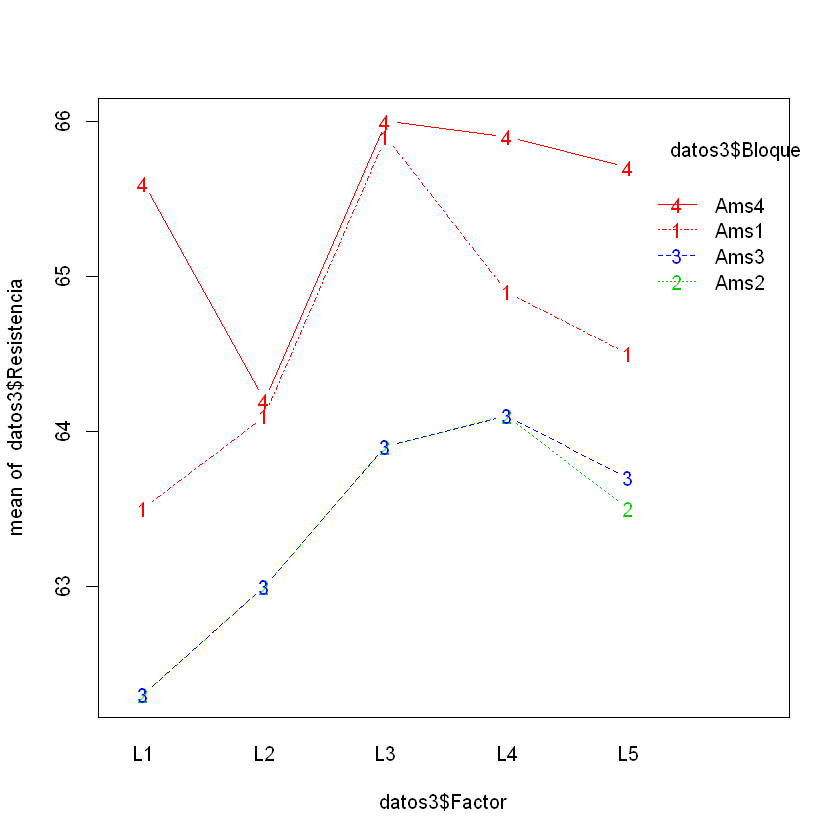

In [ ]:
# Hay algo que debemos procurar mirar, la interacción
interaction.plot(datos3$Factor,datos3$Bloque,datos3$Resistencia,type="b",col=c(2:4))

En la gráfica no podemos observar de forma clara puntos de convergencia que indiquen una interacción entre los factores y los bloques.

In [ ]:
summary(lm(Resistencia~Factor:Bloque,data=datos3))


Call:
lm(formula = Resistencia ~ Factor:Bloque, data = datos3)

Residuals:
ALL 20 residuals are 0: no residual degrees of freedom!

Coefficients: (1 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)
(Intercept)             65.7         NA      NA       NA
FactorL1:BloqueAms1     -2.2         NA      NA       NA
FactorL2:BloqueAms1     -1.6         NA      NA       NA
FactorL3:BloqueAms1      0.2         NA      NA       NA
FactorL4:BloqueAms1     -0.8         NA      NA       NA
FactorL5:BloqueAms1     -1.2         NA      NA       NA
FactorL1:BloqueAms2     -3.4         NA      NA       NA
FactorL2:BloqueAms2     -2.7         NA      NA       NA
FactorL3:BloqueAms2     -1.8         NA      NA       NA
FactorL4:BloqueAms2     -1.6         NA      NA       NA
FactorL5:BloqueAms2     -2.2         NA      NA       NA
FactorL1:BloqueAms3     -3.4         NA      NA       NA
FactorL2:BloqueAms3     -2.7         NA      NA       NA
FactorL3:Bloqu

Los valores perdidos del modelo reafirman la falta de interacción entre los factores y los bloques.

### Cuadrado Latino

Un ingeniero industrial está investigando el efecto de cuatro métodos de ensamblaje (A, B, C, D) en el tiempo de montaje de componentes de televisiones en color. Se han seleccionado cuatro operarios. Por otro lardo, el ingeniero sabe que cada método de ensamblaje produce fatiga, de manera que el tiempo requerido para el último montaje es mayor que el tiempo requerido para el primero. Para contemplar esta fuente de variabilidad, el ingeniero usa un diseño de cuadrados latinos:

                
| Orden de Montaje | OP1  | OP2  | OP3  | OP4  |
|----------|----|----|----|----|
| 1        | C  | D  | A  | B  |
| _        | 10 | 14 | 7 | 8 |
| 2        | B  | C  | D  | A  |
| _        | 7 | 18 | 11 | 8 |
| 3        | A  | B  | C  | D  |
| _        | 5 | 10 | 11 | 9 |
| 4        | D  | A  | B  | C  |
| _        | 10 | 10 | 12 | 14 |

In [ ]:
#Conjunto de datos
Input4 = (" Metodo Orden Operario Respuesta
'C'  1 1 10
'D'  1 2 14
'A'  1 3 7
'B'  1 4 8
'B'  2 1 7
'C'  2 2 18
'D'  2 3 11
'A'  2 4 8
'A'  3 1 5
'B'  3 2 10
'C'  3 3 11
'D'  3 4 9
'D'  4 1 10
'A'  4 2 10
'B'  4 3 12
'C'  4 4 14
")

read.table(textConnection(Input4),header=TRUE)->datos4
head(datos4)

Metodo,Orden,Operario,Respuesta
C,1,1,10
D,1,2,14
A,1,3,7
B,1,4,8
B,2,1,7
C,2,2,18


Cuando hay n factores en el modelo, es difícil identificar a simple vista en una tabla nxn cuáles factores podrían proporcionar diferencias estadísticamente significativas. Por lo tanto, procederemos a hacer el análisis con los modelos usados anteriormente.

In [ ]:
# Convertimos en factor Operario y Orden
attach(datos4)
Operario<-as.factor(Operario)
Orden<-as.factor(Orden)

In [ ]:
# Modelo anova
model4<-aov(Respuesta~Operario+Orden+Metodo)
summary(model4)

            Df Sum Sq Mean Sq F value  Pr(>F)   
Operario     3   51.5  17.167   9.810 0.00993 **
Orden        3   18.5   6.167   3.524 0.08852 . 
Metodo       3   72.5  24.167  13.810 0.00421 **
Residuals    6   10.5   1.750                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Podemos observar gracias al p-valor que el Orden es el único factor que no influye significativamente en la variación del desempeño de los tests. Para reforzar la hipótesis, podemos analizar las medias de cada factor.

In [ ]:
# Las tablas de medias
model.tables(model4, "mean")

Tables of means
Grand mean
      
10.25 

 Operario 
Operario
    1     2     3     4 
 8.00 13.00 10.25  9.75 

 Orden 
Orden
    1     2     3     4 
 9.75 11.00  8.75 11.50 

 Metodo 
Metodo
    A     B     C     D 
 7.50  9.25 13.25 11.00 

Las medias de Orden son mucho mas homogeneas que las de Metodo y Operario por lo tanto estos dos ultimos representan mayor variacion en los valores de desempeño

In [ ]:
# La prueba de Tukey
TukeyHSD(model4)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Respuesta ~ Operario + Orden + Metodo)

$Operario
     diff        lwr         upr     p adj
2-1  5.00  1.7618655  8.23813449 0.0070204
3-1  2.25 -0.9881345  5.48813449 0.1761447
4-1  1.75 -1.4881345  4.98813449 0.3304308
3-2 -2.75 -5.9881345  0.48813449 0.0924529
4-2 -3.25 -6.4881345 -0.01186551 0.0492740
4-3 -0.50 -3.7381345  2.73813449 0.9474067

$Orden
     diff        lwr       upr     p adj
2-1  1.25 -1.9881345 4.4881345 0.5756823
3-1 -1.00 -4.2381345 2.2381345 0.7191024
4-1  1.75 -1.4881345 4.9881345 0.3304308
3-2 -2.25 -5.4881345 0.9881345 0.1761447
4-2  0.50 -2.7381345 3.7381345 0.9474067
4-3  2.75 -0.4881345 5.9881345 0.0924529

$Metodo
     diff        lwr       upr     p adj
B-A  1.75 -1.4881345 4.9881345 0.3304308
C-A  5.75  2.5118655 8.9881345 0.0034505
D-A  3.50  0.2618655 6.7381345 0.0363534
C-B  4.00  0.7618655 7.2381345 0.0202927
D-B  1.75 -1.4881345 4.9881345 0.3304308
D-C 

Por último vemos en la prueba de Tukey que los factores con p-valores menores a 0.05 son Operario y Metodo. Debido a esto, podemos asumir que estos factores tienen un efecto estadísticamente significativo en el desempeño de los tests.

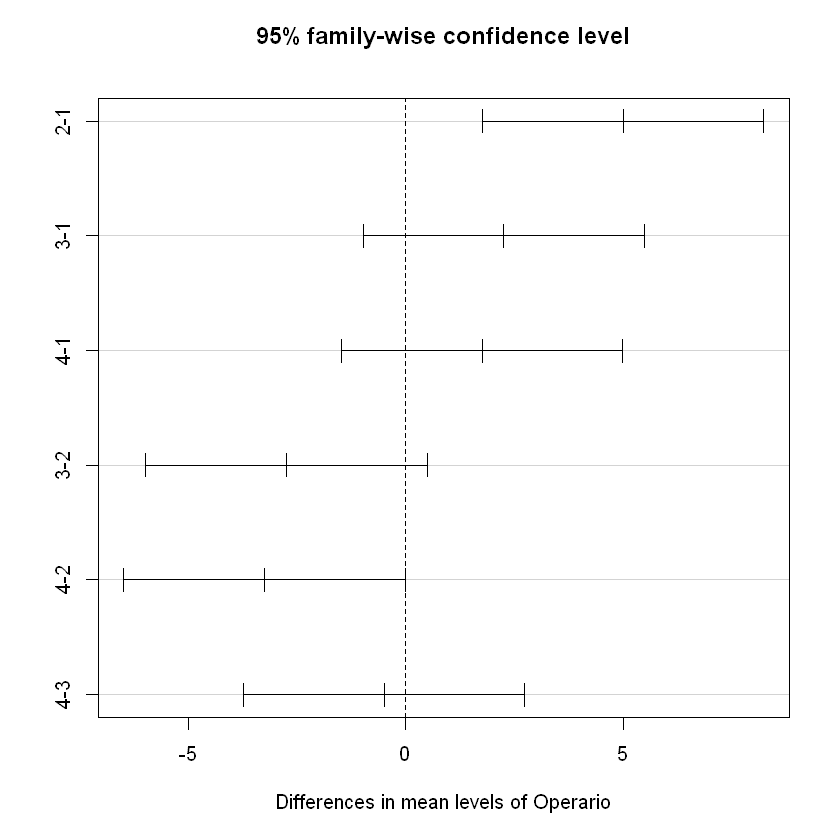

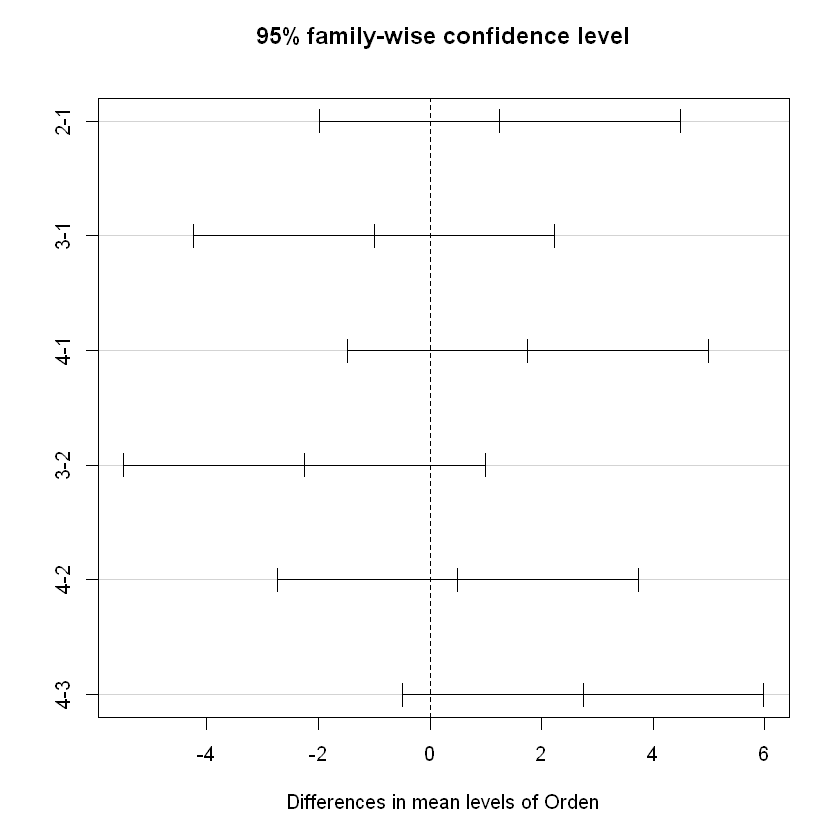

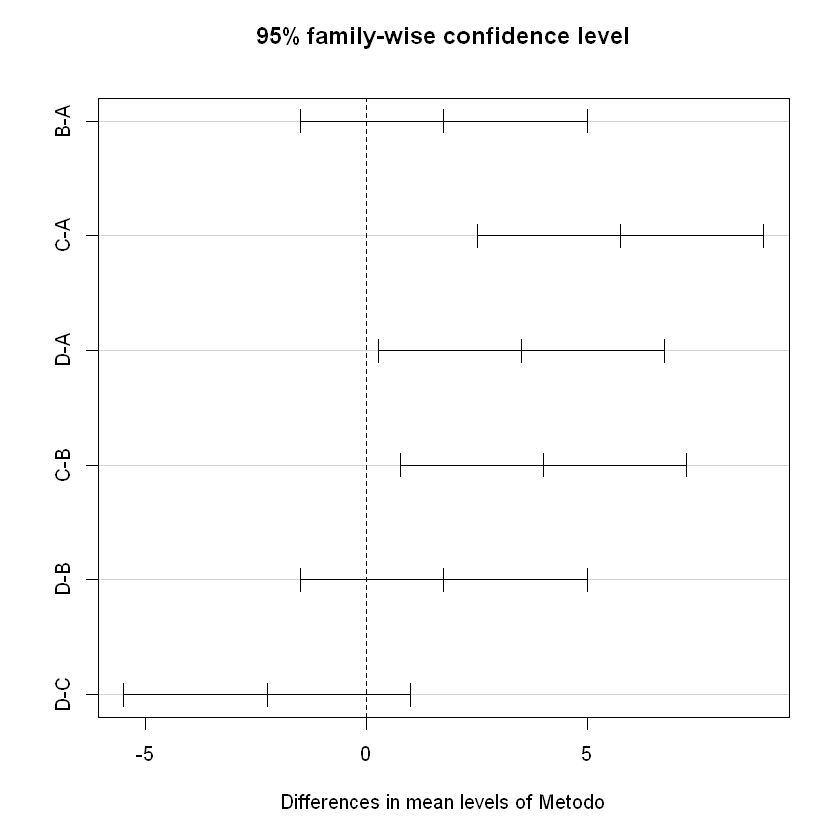

In [ ]:
#Gráfica de medias
plot(TukeyHSD(model4))

Estos mismos resultados se pueden observar en la gráfica de las medias de una manera más sencilla ,en la cual solo el par de Operario 2-1 no es interceptado por la línea. De igual forma, los pares de Metodo C-A, D-A y C-B tampoco son interceptados.